# 1. Загрузка и предварительный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid' , {'grid.color': '0.1'})

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

import timeit

In [2]:
# функция для вывода информации о датафрейме
def df_info(df):
    display(df)
    df.info()

In [3]:
try:
    data_arc = pd.read_csv('data_arc.csv')
    data_bulk = pd.read_csv('data_bulk.csv')
    data_bulk_time = pd.read_csv('data_bulk_time.csv')
    data_gas = pd.read_csv('data_gas.csv')
    data_temp = pd.read_csv('data_temp.csv')
    data_wire = pd.read_csv('data_wire.csv')
    data_wire_time = pd.read_csv('data_wire_time.csv')
except:
    data_arc = pd.read_csv('/datasets/final_steel/data_arc.csv')
    data_bulk = pd.read_csv('/datasets/final_steel/data_bulk.csv')
    data_bulk_time = pd.read_csv('/datasets/final_steel/data_bulk_time.csv')
    data_gas = pd.read_csv('/datasets/final_steel/data_gas.csv')
    data_temp = pd.read_csv('/datasets/final_steel/data_temp.csv')
    data_wire = pd.read_csv('/datasets/final_steel/data_wire.csv')
    data_wire_time = pd.read_csv('/datasets/final_steel/data_wire_time.csv')   

In [4]:
df_info(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [5]:
df_info(data_bulk)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,252.0,NaN,130.0,206.0
3125,3238,NaN,NaN,126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0,NaN,108.0,106.0
3126,3239,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,158.0,NaN,270.0,88.0
3127,3240,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.0,54.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      3129 non-null   int64  
 1   Bulk 1   252 non-null    float64
 2   Bulk 2   22 non-null     float64
 3   Bulk 3   1298 non-null   float64
 4   Bulk 4   1014 non-null   float64
 5   Bulk 5   77 non-null     float64
 6   Bulk 6   576 non-null    float64
 7   Bulk 7   25 non-null     float64
 8   Bulk 8   1 non-null      float64
 9   Bulk 9   19 non-null     float64
 10  Bulk 10  176 non-null    float64
 11  Bulk 11  177 non-null    float64
 12  Bulk 12  2450 non-null   float64
 13  Bulk 13  18 non-null     float64
 14  Bulk 14  2806 non-null   float64
 15  Bulk 15  2248 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 391.2 KB


In [6]:
df_info(data_bulk_time)

,key,Bulk 1,Bulk 2,Bulk 3,Bulk 4,Bulk 5,Bulk 6,Bulk 7,Bulk 8,Bulk 9,Bulk 10,Bulk 11,Bulk 12,Bulk 13,Bulk 14,Bulk 15
0,1,NaN,NaN,NaN,2019-05-03 11:21:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:03:52,NaN,2019-05-03 11:03:52,2019-05-03 11:03:52
1,2,NaN,NaN,NaN,2019-05-03 11:46:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 11:40:20,NaN,2019-05-03 11:40:20,2019-05-03 11:40:20
2,3,NaN,NaN,NaN,2019-05-03 12:31:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:09:40,NaN,2019-05-03 12:09:40,2019-05-03 12:09:40
3,4,NaN,NaN,NaN,2019-05-03 12:48:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 12:41:24,NaN,2019-05-03 12:41:24,2019-05-03 12:41:24
4,5,NaN,NaN,NaN,2019-05-03 13:18:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-05-03 13:12:56,NaN,2019-05-03 13:12:56,2019-05-03 13:12:56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3124,3237,NaN,NaN,2019-08-31 22:51:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 22:46:52,NaN,2019-08-31 22:46:52,2019-08-31 22:46:52
3125,3238,NaN,NaN,2019-08-31 23:39:11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-08-31 23:33:09,NaN,2019-08-31 23:33:09,2019-08-31 23:33:09
3126,3239,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:51:58,NaN,NaN,NaN,NaN,NaN,2019-09-01 01:39:41,NaN,2019-09-01 01:33:25,2019-09-01 01:33:25
3127,3240,NaN,NaN,NaN,NaN,NaN,2019-09-01 03:12:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-01 02:41:27,2019-09-01 02:41:27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3129 entries, 0 to 3128
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   key      3129 non-null   int64 
 1   Bulk 1   252 non-null    object
 2   Bulk 2   22 non-null     object
 3   Bulk 3   1298 non-null   object
 4   Bulk 4   1014 non-null   object
 5   Bulk 5   77 non-null     object
 6   Bulk 6   576 non-null    object
 7   Bulk 7   25 non-null     object
 8   Bulk 8   1 non-null      object
 9   Bulk 9   19 non-null     object
 10  Bulk 10  176 non-null    object
 11  Bulk 11  177 non-null    object
 12  Bulk 12  2450 non-null   object
 13  Bulk 13  18 non-null     object
 14  Bulk 14  2806 non-null   object
 15  Bulk 15  2248 non-null   object
dtypes: int64(1), object(15)
memory usage: 391.2+ KB


In [7]:
df_info(data_arc)

,key,Начало нагрева дугой,Конец нагрева дугой,Активная мощность,Реактивная мощность
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14876 entries, 0 to 14875
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   key                   14876 non-null  int64  
 1   Начало нагрева дугой  14876 non-null  object 
 2   Конец нагрева дугой   14876 non-null  object 
 3   Активная мощность     14876 non-null  float64
 4   Реактивная мощность   14876 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 581.2+ KB


In [8]:
df_info(data_gas)

,key,Газ 1
0,1,29.749986
1,2,12.555561
2,3,28.554793
3,4,18.841219
4,5,5.413692
...,...,...
3234,3237,5.543905
3235,3238,6.745669
3236,3239,16.023518
3237,3240,11.863103


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3239 entries, 0 to 3238
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3239 non-null   int64  
 1   Газ 1   3239 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 50.7 KB


In [9]:
df_info(data_temp)

,key,Время замера,Температура
0,1,2019-05-03 11:16:18,1571.0
1,1,2019-05-03 11:25:53,1604.0
2,1,2019-05-03 11:29:11,1618.0
3,1,2019-05-03 11:30:01,1601.0
4,1,2019-05-03 11:30:39,1613.0
...,...,...,...
15902,3241,2019-09-01 04:03:30,1586.0
15903,3241,2019-09-01 04:16:12,NaN
15904,3241,2019-09-01 04:22:39,NaN
15905,3241,2019-09-01 04:33:42,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   key           15907 non-null  int64  
 1   Время замера  15907 non-null  object 
 2   Температура   13006 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 372.9+ KB


In [10]:
df_info(data_wire)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,38.088959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,56.128799,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,143.357761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,34.070400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   key     3081 non-null   int64  
 1   Wire 1  3055 non-null   float64
 2   Wire 2  1079 non-null   float64
 3   Wire 3  63 non-null     float64
 4   Wire 4  14 non-null     float64
 5   Wire 5  1 non-null      float64
 6   Wire 6  73 non-null     float64
 7   Wire 7  11 non-null     float64
 8   Wire 8  19 non-null     float64
 9   Wire 9  29 non-null     float64
dtypes: float64(9), int64(1)
memory usage: 240.8 KB


In [11]:
df_info(data_wire_time)

,key,Wire 1,Wire 2,Wire 3,Wire 4,Wire 5,Wire 6,Wire 7,Wire 8,Wire 9
0,1,2019-05-03 11:11:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2019-05-03 11:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2019-05-03 12:13:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2019-05-03 12:48:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2019-05-03 13:18:15,2019-05-03 13:32:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
3076,3237,2019-08-31 22:50:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3077,3238,2019-08-31 23:38:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3078,3239,2019-09-01 01:50:43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3079,3240,2019-09-01 03:12:02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3081 entries, 0 to 3080
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key     3081 non-null   int64 
 1   Wire 1  3055 non-null   object
 2   Wire 2  1079 non-null   object
 3   Wire 3  63 non-null     object
 4   Wire 4  14 non-null     object
 5   Wire 5  1 non-null      object
 6   Wire 6  73 non-null     object
 7   Wire 7  11 non-null     object
 8   Wire 8  19 non-null     object
 9   Wire 9  29 non-null     object
dtypes: int64(1), object(9)
memory usage: 240.8+ KB


По выведенным данным видим:
  - столбцы имеют неудобные для работы названия
  - во всех датасетах неправильный тип данных у времени
  - есть пропуски
  - стоит проверить, что data_bulk & data_bulk_time / data_wire & data_wire_time  верно синхронизированы (т.е NaN в измерении соответствует NaN-у во времени измерения)
  - в некоторых столбцах wire и bulk  почти все значения пропуски.

  Переименуем столбцы

In [12]:
data_arc.columns = ['key','start_heat_time', 'end_heat_time', 'active_capacity', 'reactive_capacity']
data_bulk.columns = ['key'] + ['bulk_'+ str(i) for i in  range(1,16)]
data_bulk_time.columns = ['key'] + ['bulk_time_'+ str(i) for i in  range(1,16)]
data_wire.columns = ['key'] + ['wire_'+ str(i) for i in  range(1,10)]
data_wire_time.columns = ['key'] + ['wire_time_'+ str(i) for i in  range(1,10)]
data_gas.columns = ['key', 'gas']
data_temp.columns = ['key', 'sample_time', 'temp']


  Установим правильный тип данных для времени

In [13]:
data_arc['start_heat_time'] = pd.to_datetime(data_arc['start_heat_time'])
data_arc['end_heat_time'] = pd.to_datetime(data_arc['end_heat_time'])
data_temp['sample_time'] = pd.to_datetime(data_temp['sample_time'])

data_bulk_time[['bulk_time_'+ str(i) for i in  range(1,16)]] = data_bulk_time[
               ['bulk_time_'+ str(i) for i in  range(1,16)]].apply(pd.to_datetime)

data_wire_time[['wire_time_'+ str(i) for i in  range(1,10)]] = data_wire_time[
               ['wire_time_'+ str(i) for i in  range(1,10)]].apply(pd.to_datetime)  

Проверяем синхронизированность между data_bulk & data_bulk_time / data_wire & data_wire_time

In [14]:
# следующее выражение провеяет синхронизированность. Если данные синхронизированы то по каждому столбцу выведется 1, если нет - 0...0.999999
(((data_bulk.isna() & data_bulk.isna()) | (~data_bulk.isna() & ~data_bulk.isna()))).mean() 

key        1.0
bulk_1     1.0
bulk_2     1.0
bulk_3     1.0
bulk_4     1.0
bulk_5     1.0
bulk_6     1.0
bulk_7     1.0
bulk_8     1.0
bulk_9     1.0
bulk_10    1.0
bulk_11    1.0
bulk_12    1.0
bulk_13    1.0
bulk_14    1.0
bulk_15    1.0
dtype: float64

In [15]:
(((data_wire.isna() & data_wire.isna()) | (~data_wire.isna() & ~data_wire.isna()))).mean() 

key       1.0
wire_1    1.0
wire_2    1.0
wire_3    1.0
wire_4    1.0
wire_5    1.0
wire_6    1.0
wire_7    1.0
wire_8    1.0
wire_9    1.0
dtype: float64

Данные синхронизированы

# 2. Обработка пропусков  
## 2.1 Пропуски в Data_temp

In [16]:
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15907 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          15907 non-null  int64         
 1   sample_time  15907 non-null  datetime64[ns]
 2   temp         13006 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 372.9 KB


Первым делом, удаляем циклы в которых есть всего одна запись т.к. не понятно как ее трактовать - как начальное или конечное

In [17]:
data_temp.fillna(0).groupby('key')['temp'].count().sort_values()

key
279      1
195      1
2497     2
151      2
1415     2
        ..
2108    15
1214    16
44      16
46      16
1513    16
Name: temp, Length: 3216, dtype: int64

Нашли 2 таких плавки. Удаляем их

In [18]:
bad_keys = list(data_temp.fillna(0).groupby('key')['temp'].count().sort_values()[
                                                                      data_temp.fillna(0).groupby('key')['temp'].count().sort_values() <=1
                                                                                ].index)
print(bad_keys)
data_temp = data_temp[~data_temp['key'].isin(bad_keys)]
data_temp.info()

[279, 195]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 15905 entries, 0 to 15906
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          15905 non-null  int64         
 1   sample_time  15905 non-null  datetime64[ns]
 2   temp         13004 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 497.0 KB


Если у нас есть циклы, где неизвестен таргет, то такие данные нельзя использовать при создании модели, их надо удалить.
Вычленим из всех плавок данные по последним измерениям

In [19]:
data_temp_end = data_temp.groupby('key')['sample_time'].max().reset_index()
data_temp_end = data_temp_end.merge(data_temp, how = 'left', on = ['key', 'sample_time'])
data_temp_end.columns = ['key' , 'sample_time_end' , 'temp_end']
data_temp_end

,key,sample_time_end,temp_end
0,1,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:36:01,1602.0
...,...,...,...
3209,3237,2019-08-31 23:05:43,NaN
3210,3238,2019-08-31 23:43:00,NaN
3211,3239,2019-09-01 02:24:15,NaN
3212,3240,2019-09-01 03:35:16,NaN


Видим NaNы. Значит такие плавки надо удалить

In [20]:
bad_keys = list(data_temp_end[data_temp_end['temp_end'].isna()]['key'])
data_temp_end = data_temp_end[~data_temp_end['temp_end'].isna()]
data_temp_end

,key,sample_time_end,temp_end
0,1,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:36:01,1602.0
...,...,...,...
2470,2495,2019-08-06 00:54:42,1591.0
2471,2496,2019-08-06 01:29:52,1591.0
2472,2497,2019-08-06 01:53:50,1589.0
2473,2498,2019-08-06 02:25:31,1594.0


И удаляем "плохие" плавки из изначального датасета

In [21]:
data_temp = data_temp[~data_temp['key'].isin(bad_keys)]
data_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12265 entries, 0 to 12266
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   key          12265 non-null  int64         
 1   sample_time  12265 non-null  datetime64[ns]
 2   temp         12265 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 383.3 KB


Все пропуски в data_temp заполнили.  Пока что не будем удалять "плохие" плавки из других датасетов чтобы посмотреть на полные данные во время EDA. 
### 2.1 Пропуски в bulk и wire.  
Пропуски в них можно рассматривать как "этот материал не добавлялся в данной итерации". Т.е. можно заполнить пропуски нулями.  Соответствующие пропуски во временных отметках также не трогаем 

#### На данном этапе НЕ будем заполнять пропуски нулями, т.к. они будут мешать при построении гистограмм в иследовательском анализе. Обработаем эти пропуски на этапе подбора предсказательной модели 

# 3. Исследовательский анализ данных
1. Исследование распределения числовых и категориальных признаков. Поиск выбросов
2. Коррелляционный анализ
3. Выводы
  
## 3.1 Исследуем распределения данных и выбросы
## 3.1.1 data_temp


Проверяем что измерения идут последовательно во времени

In [22]:
data_temp['sample_time'].is_monotonic

False

Не выполняется. Это странно. Необходимо проверить, что последовательность во времени выполняется внутри каждой плавки.  
Методом shift создадим новые столбцы с перемещенными вниз на одну строку значениями 

In [23]:
df_shift = pd.concat([data_temp, data_temp.shift()], axis = 1)
df_shift.columns = ['key', 'sample_time', 'time', 'key_shift', 'sample_time_shift', 'time_shift']
df_shift

,key,sample_time,time,key_shift,sample_time_shift,time_shift
0,1,2019-05-03 11:16:18,1571.0,NaN,NaT,NaN
1,1,2019-05-03 11:25:53,1604.0,1.0,2019-05-03 11:16:18,1571.0
2,1,2019-05-03 11:29:11,1618.0,1.0,2019-05-03 11:25:53,1604.0
3,1,2019-05-03 11:30:01,1601.0,1.0,2019-05-03 11:29:11,1618.0
4,1,2019-05-03 11:30:39,1613.0,1.0,2019-05-03 11:30:01,1601.0
...,...,...,...,...,...,...
12262,2498,2019-08-06 02:19:26,1593.0,2498.0,2019-08-06 02:12:00,1580.0
12263,2498,2019-08-06 02:25:31,1594.0,2498.0,2019-08-06 02:19:26,1593.0
12264,2499,2019-08-06 02:40:25,1569.0,2498.0,2019-08-06 02:25:31,1594.0
12265,2499,2019-08-06 02:54:24,1604.0,2499.0,2019-08-06 02:40:25,1569.0


Теперь запишем условие для вывода строк, в которых нарушается последовательность во времени и это нарушение между показаниями внутри одной плавки

In [24]:
df_shift[
    
    (df_shift['sample_time'] < df_shift['sample_time_shift']) & # условие нарушения последовательности
    (df_shift['key'] == df_shift['key_shift'])  # условие, что нарушение произошло внутри одной и той же плавки
]

,key,sample_time,time,key_shift,sample_time_shift,time_shift


Такие строки отсутствуют. Не надо ничего удалять  

Посмотрим на распределение температуры


In [25]:
# Задаем функцию для построения гистограммы и ящика с усами
def hist_box_plot(data, x_plot, y_plot, title):
  fig, ax = plt.subplots(2,1, figsize = (x_plot,y_plot))
  ax[0].set_title(title)
  sns.distplot(data, kde=False, ax = ax[0])
  sns.boxplot(data, ax = ax[1])

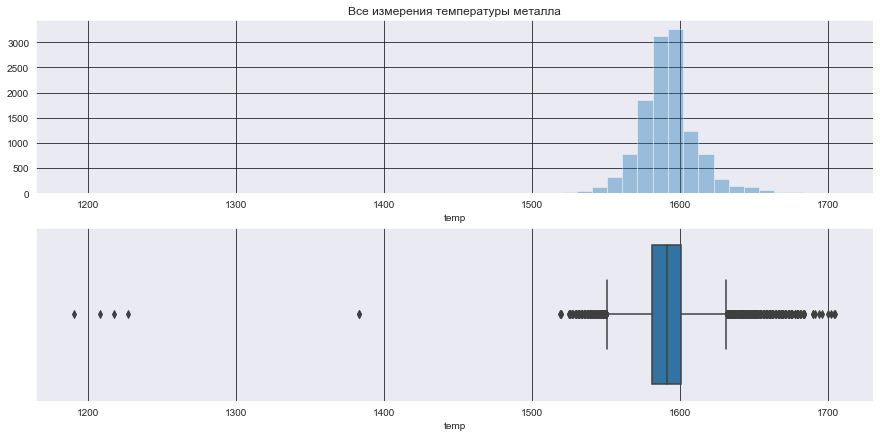

In [26]:
hist_box_plot(data_temp['temp'], 15, 7, 'Все измерения температуры металла')

Температура имеет нормальное распределение. Есть выбросы.   Не будем их удалять, оставим этот вопрос на этап обучения модели  
Также посмотрим на распределения начальных и конечных температур каждой плавки.  
На этапе заполнения пропусков мы уже создали датасет с конечными значениями температур _data_temp_end_.  По аналогии с ним создадим датасет _data_temp_start_ 

In [27]:
data_temp_start = data_temp.groupby('key')['sample_time'].min().reset_index()
data_temp_start = data_temp_start.merge(data_temp, how = 'left', on = ['key', 'sample_time'])
data_temp_start.columns = ['key', 'sample_time_start', 'temp_start']
data_temp_start

,key,sample_time_start,temp_start
0,1,2019-05-03 11:16:18,1571.0
1,2,2019-05-03 11:37:27,1581.0
2,3,2019-05-03 12:13:17,1596.0
3,4,2019-05-03 12:52:57,1601.0
4,5,2019-05-03 13:23:19,1576.0
...,...,...,...
2470,2495,2019-08-06 00:35:45,1570.0
2471,2496,2019-08-06 01:02:54,1554.0
2472,2497,2019-08-06 01:41:53,1571.0
2473,2498,2019-08-06 02:03:49,1591.0


Теперь объединяем датасеты с начальной и конечной температурой

In [28]:
data_temp_start_end = data_temp_start.merge(data_temp_end, on = ['key'])
data_temp_start_end

,key,sample_time_start,temp_start,sample_time_end,temp_end
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0
...,...,...,...,...,...
2470,2495,2019-08-06 00:35:45,1570.0,2019-08-06 00:54:42,1591.0
2471,2496,2019-08-06 01:02:54,1554.0,2019-08-06 01:29:52,1591.0
2472,2497,2019-08-06 01:41:53,1571.0,2019-08-06 01:53:50,1589.0
2473,2498,2019-08-06 02:03:49,1591.0,2019-08-06 02:25:31,1594.0


Строим гистограммы начальных и конечных температур плавок

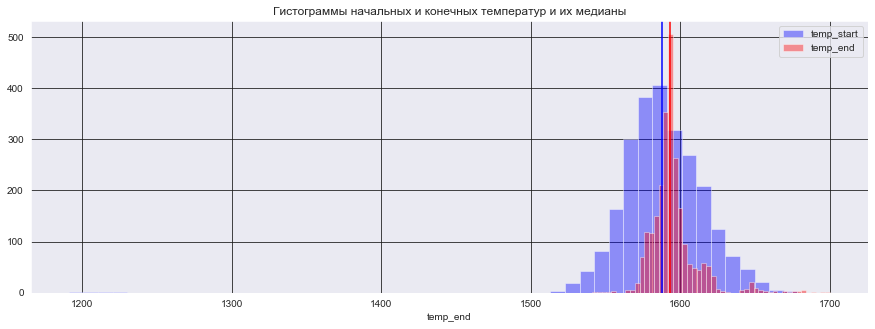

In [29]:
plt.figure(figsize=(15,5))
sns.distplot(data_temp_start_end['temp_start'], kde = False, label= 'temp_start', color='b')
sns.distplot(data_temp_start_end['temp_end'], kde = False,  label= 'temp_end', color='red')
plt.axvline(x = data_temp_start_end['temp_start'].median(), color='b')
plt.axvline(x = data_temp_start_end['temp_end'].median(), color='r')
plt.title('Гистограммы начальных и конечных температур и их медианы')
plt.legend()

Видим что в среднем температура в конце плавки выше чем в начале.  Также по гистограмме видим выбросы - покажем их на boxplot

Text(0.5, 1.0, 'Ящики с усами для температур в начале и в конце плавки')

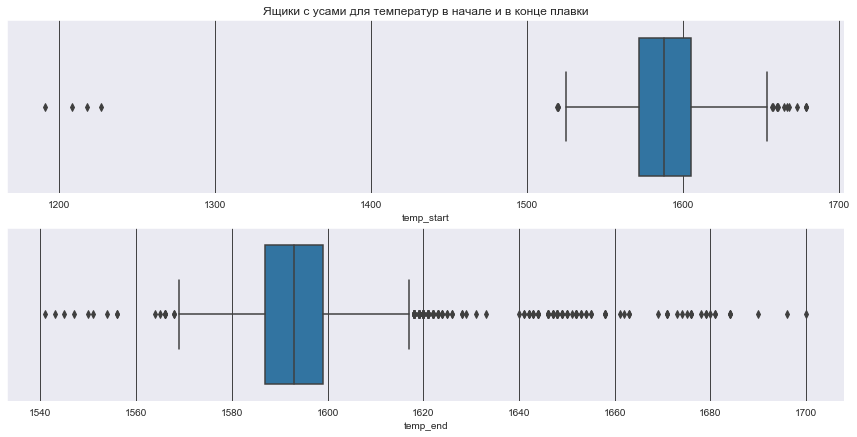

In [30]:
fig, ax = plt.subplots(2,1, figsize=(15,7))
sns.boxplot(data_temp_start_end['temp_start'],ax = ax[0])
sns.boxplot(data_temp_start_end['temp_end'],ax = ax[1])
ax[0].set_title('Ящики с усами для температур в начале и в конце плавки')

Имеются выбросы


Посмотрим на распределение разницы между температурами в конце и в начале

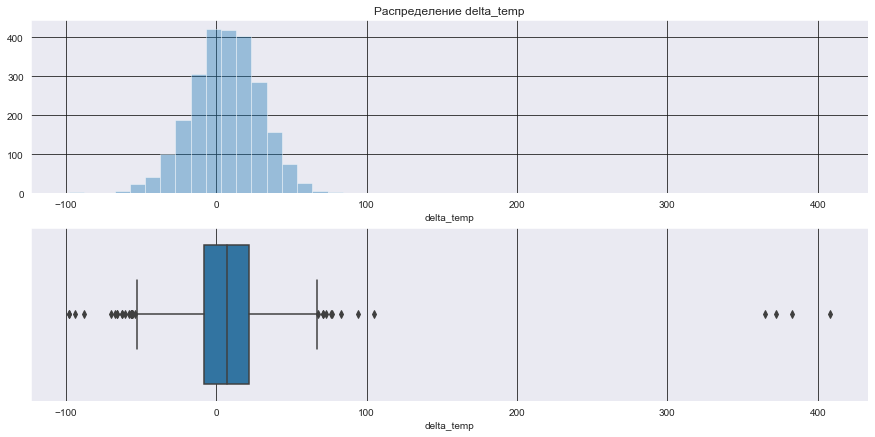

In [31]:
# создаем столбец с этой величиной
data_temp_start_end['delta_temp'] = data_temp_start_end['temp_end'] - data_temp_start_end['temp_start']

# Строим гистограмму
hist_box_plot(data_temp_start_end['delta_temp'], 15, 7, 'Распределение delta_temp')

Видим, что на очень многих плавках температура в конце НИЖЕ, чем в начале. Также имеются выбросы  
  
Посмотрим на количество измерений в каждой плавке

In [32]:
data_temp_start_end = data_temp_start_end.merge(
    data_temp.groupby('key')['key'].count().rename('number_samples').reset_index(),
    on = 'key'
)

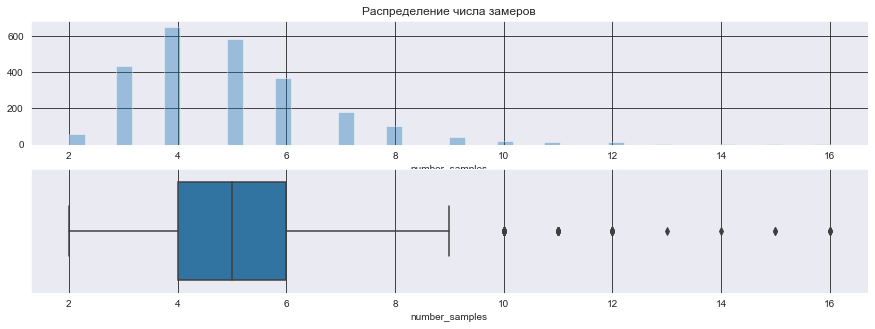

In [33]:
hist_box_plot(data_temp_start_end['number_samples'], 15, 5, 'Распределение числа замеров')

Видим нормальное распределение. 
Также посмотрим на распределение общего времени каждой плавки

In [34]:
data_temp_start_end

,key,sample_time_start,temp_start,sample_time_end,temp_end,delta_temp,number_samples
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,42.0,5
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,21.0,6
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,3.0,5
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,24.0,3
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,26.0,2
...,...,...,...,...,...,...,...
2470,2495,2019-08-06 00:35:45,1570.0,2019-08-06 00:54:42,1591.0,21.0,3
2471,2496,2019-08-06 01:02:54,1554.0,2019-08-06 01:29:52,1591.0,37.0,4
2472,2497,2019-08-06 01:41:53,1571.0,2019-08-06 01:53:50,1589.0,18.0,2
2473,2498,2019-08-06 02:03:49,1591.0,2019-08-06 02:25:31,1594.0,3.0,5


In [35]:
data_temp_start_end['delta_time_minutes'] = (data_temp_start_end['sample_time_end'] - data_temp_start_end['sample_time_start']).astype('timedelta64[m]')
data_temp_start_end['delta_time_minutes']

0       14.0
1       21.0
2       21.0
3        6.0
4       12.0
        ... 
2470    18.0
2471    26.0
2472    11.0
2473    21.0
2474    20.0
Name: delta_time_minutes, Length: 2475, dtype: float64

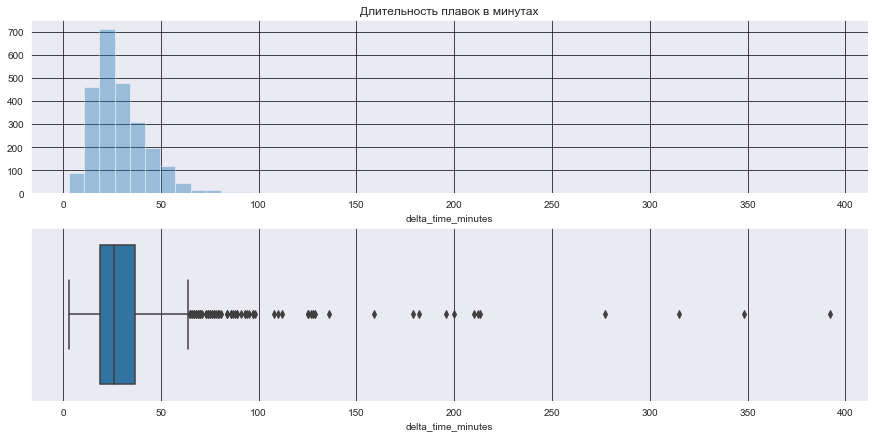

In [36]:
hist_box_plot(data_temp_start_end['delta_time_minutes'], 15, 7, 'Длительность плавок в минутах')

Также видим нормальное распределение. И есть выбросы. Врядли на самом деле был реализована такая  долгая плавка. Скорее всего это ошибка в данных

### 3.1.2 data_arc

In [37]:
data_arc

,key,start_heat_time,end_heat_time,active_capacity,reactive_capacity
0,1,2019-05-03 11:02:14,2019-05-03 11:06:02,0.976059,0.687084
1,1,2019-05-03 11:07:28,2019-05-03 11:10:33,0.805607,0.520285
2,1,2019-05-03 11:11:44,2019-05-03 11:14:36,0.744363,0.498805
3,1,2019-05-03 11:18:14,2019-05-03 11:24:19,1.659363,1.062669
4,1,2019-05-03 11:26:09,2019-05-03 11:28:37,0.692755,0.414397
...,...,...,...,...,...
14871,3241,2019-09-01 03:58:58,2019-09-01 04:01:35,0.533670,0.354439
14872,3241,2019-09-01 04:05:04,2019-09-01 04:08:04,0.676604,0.523631
14873,3241,2019-09-01 04:16:41,2019-09-01 04:19:45,0.733899,0.475654
14874,3241,2019-09-01 04:31:51,2019-09-01 04:32:48,0.220694,0.145768


Проверим, что у нас конец нагрева всегда позднее начала

In [38]:
data_arc[data_arc['start_heat_time'] > data_arc['end_heat_time']]

,key,start_heat_time,end_heat_time,active_capacity,reactive_capacity


В этом плане все хорошо  
Посмотрим на распределение мощностей

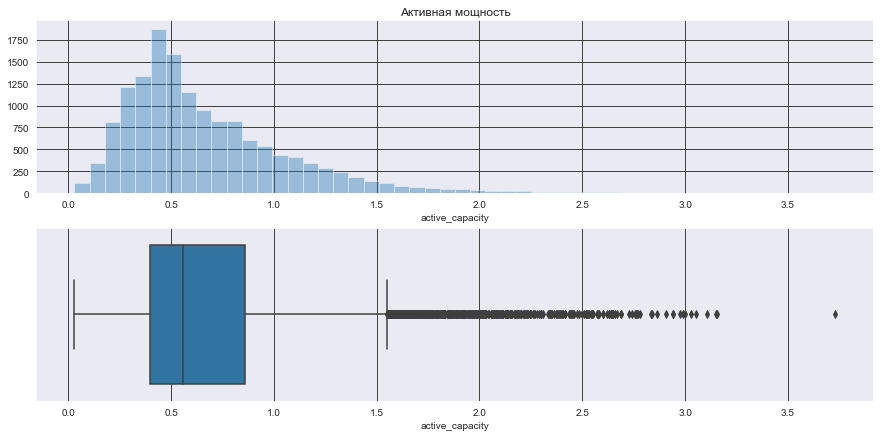

In [39]:
hist_box_plot(data_arc['active_capacity'], 15, 7, 'Активная мощность')

Нормальное распределение. Есть один выброс

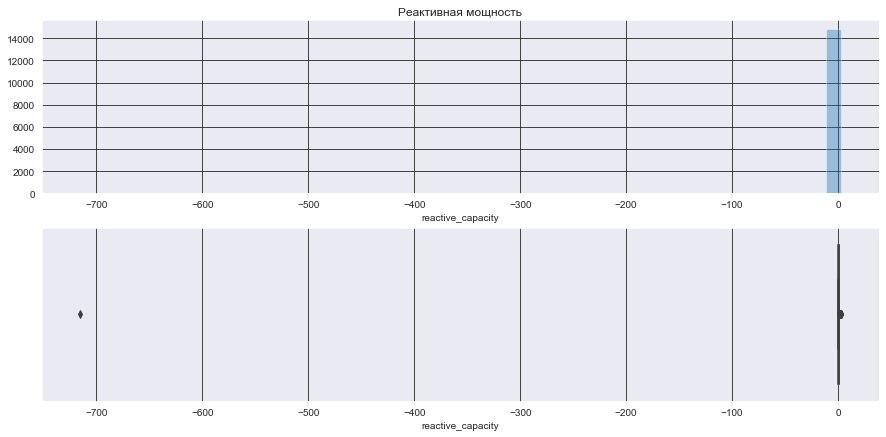

In [40]:
hist_box_plot(data_arc['reactive_capacity'], 15, 7, 'Реактивная мощность')

Тут видим явную ошибку в данных - очень большое по модулю отрицательно значение мощности. Посмотрим на эту строку

In [41]:
data_arc[data_arc['reactive_capacity'] < 0]['reactive_capacity']

9780   -715.504924
Name: reactive_capacity, dtype: float64

Выхлядит, как будто величину ошибочно умножили на -1000.  Вернем ее нормально значение

In [42]:
data_arc.loc[9780, 'reactive_capacity'] = abs(data_arc.loc[9780, 'reactive_capacity']) / 1000

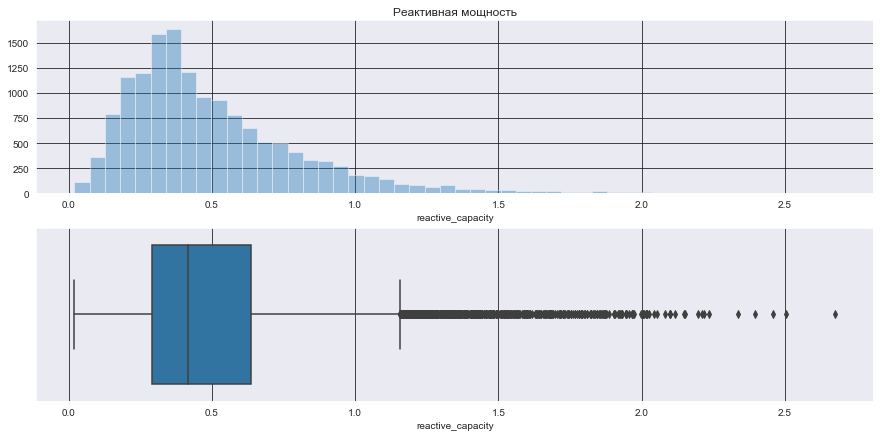

In [43]:
hist_box_plot(data_arc['reactive_capacity'], 15, 7, 'Реактивная мощность')

Также нормальное распределение  
Посмотрим на гистограммы на одном графике

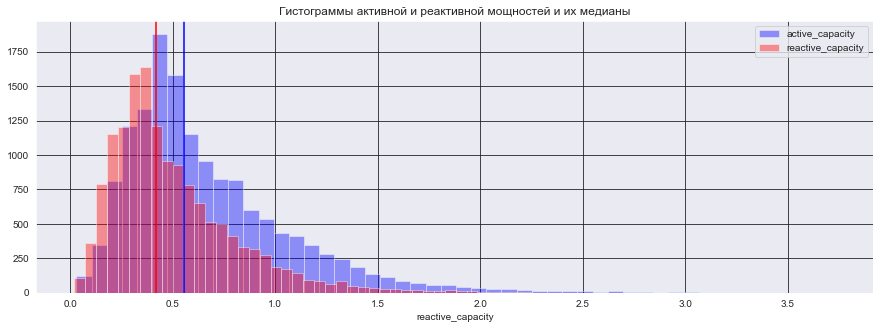

In [44]:
plt.figure(figsize=(15,5))
sns.distplot(data_arc['active_capacity'], kde = False, label= 'active_capacity', color='b')
sns.distplot(data_arc['reactive_capacity'], kde = False,  label= 'reactive_capacity', color='red')
plt.axvline(x = data_arc['active_capacity'].median(), color='b')
plt.axvline(x = data_arc['reactive_capacity'].median(), color='r')
plt.title('Гистограммы активной и реактивной мощностей и их медианы')
plt.legend()

Видим, что реактивная мощность в среднем меньше. Посмотрим на распределение разницы мощностей

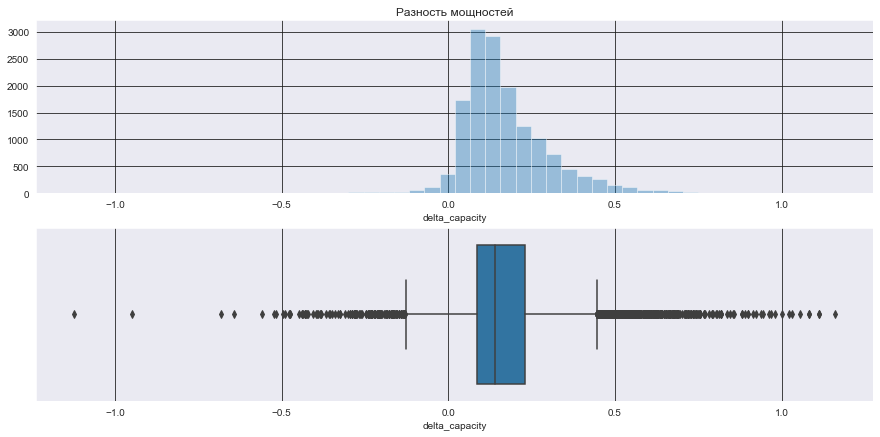

In [45]:
data_arc['delta_capacity'] = data_arc['active_capacity'] - data_arc['reactive_capacity']

hist_box_plot(data_arc['delta_capacity'], 15, 7, 'Разность мощностей')

Нормальное распределение. Также видим, что есть плавки, где реактивная мощность выше активной. Теоретически такое возможно, но в идеале надо проконсультироваться с техническими специалистами. 
  
Также вычислим длительность нагрева в каждой плавке и посмотрим на ее распределение

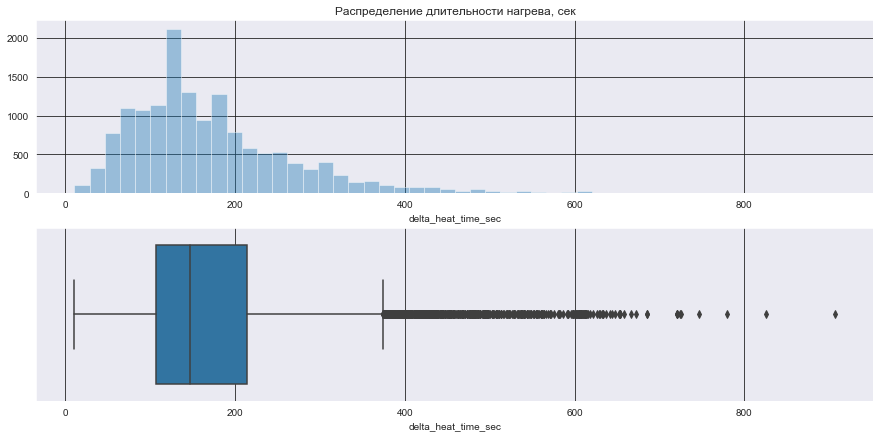

In [46]:
data_arc['delta_heat_time_sec'] = (data_arc['end_heat_time'] - data_arc['start_heat_time']).astype('timedelta64[s]')

hist_box_plot(data_arc['delta_heat_time_sec'], 15, 7, 
              'Распределение длительности нагрева, сек')

Нормальное распределение, есть выбросы

In [47]:
# Вычисляем отношение активной к реактивной мощности
data_arc['ratio_capacity'] = data_arc['active_capacity'] / data_arc['reactive_capacity']

In [48]:
# Умножаем мощность на время - получаем энергию
data_arc['active_energy'] = data_arc['active_capacity'] * data_arc['delta_heat_time_sec']
data_arc['reactive_energy'] = data_arc['reactive_capacity'] * data_arc['delta_heat_time_sec']
data_arc['delta_energy'] = data_arc['delta_capacity'] * data_arc['delta_heat_time_sec']

In [49]:
# Группируемся по key
data_arc_group = data_arc.groupby('key').agg({'delta_heat_time_sec': ['sum', 'mean', 'max'], 
                             'ratio_capacity': 'mean' , 
                             'active_energy': ['sum', 'mean'], 
                             'reactive_energy': ['sum','mean'],
                             'delta_energy': 'mean'
                            }).reset_index()

# задаем правильные названия столбцов
data_arc_group.columns = ['key', 
                          'heat_duration_sum' ,  # суммарная длительность нагрева
                          'heat_duration_mean' , # средняя длительность нагрева
                          'heat_duration_max',   # максиальная длительность нагрева
                          'ratio_capacity_mean' , # среднее отношение мощностей
                          'active_energy_sum' , # суммарная энергия
                          'active_energy_mean' , # средняя энергия за один нагрев
                          'reactive_energy_sum' ,  # суммарная энергия
                          'reactive_energy_mean',  # средняя энергия за один нагрев
                          'delta_energy_mean']  # средняя разница энергий

# среднее отношение произведенных активной и реактивной энергий
# ДА, ВСЕ ВЕРНО  sum / sum = mean. Исправлять не надо. Проследите логику вычислений. В конце концов это просто мой фич
data_arc_group['ratio_energy_mean'] = data_arc_group['active_energy_sum'] / data_arc_group['reactive_energy_sum']   
data_arc_group

,key,heat_duration_sum,heat_duration_mean,heat_duration_max,ratio_capacity_mean,active_energy_sum,active_energy_mean,reactive_energy_sum,reactive_energy_mean,delta_energy_mean,ratio_energy_mean
0,1,1098.0,219.60,365.0,1.538898,1207.804249,241.560850,787.907510,157.581502,83.979348,1.532926
1,2,811.0,202.75,338.0,1.551834,733.816470,183.454118,487.590677,121.897669,61.556448,1.504985
2,3,655.0,131.00,280.0,1.583120,443.583327,88.716665,280.936835,56.187367,32.529298,1.578943
3,4,741.0,185.25,278.0,1.563487,670.663327,167.665832,429.935932,107.483983,60.181849,1.559915
4,5,869.0,217.25,415.0,1.480428,997.496095,249.374024,664.940090,166.235022,83.139001,1.500129
...,...,...,...,...,...,...,...,...,...,...,...
3209,3237,909.0,181.80,242.0,1.384203,777.993447,155.598689,559.334413,111.866883,43.731807,1.390927
3210,3238,546.0,182.00,265.0,1.257794,432.849310,144.283103,348.343323,116.114441,28.168662,1.242594
3211,3239,1216.0,152.00,294.0,1.497918,844.977151,105.622144,557.964769,69.745596,35.876548,1.514392
3212,3240,839.0,167.80,274.0,1.257343,554.283211,110.856642,471.603883,94.320777,16.535866,1.175315


Посмотрим на распределения сгруппированных и сгенерированных признаков

In [50]:
data_arc_group.drop(columns = 'key').shape[1]

10

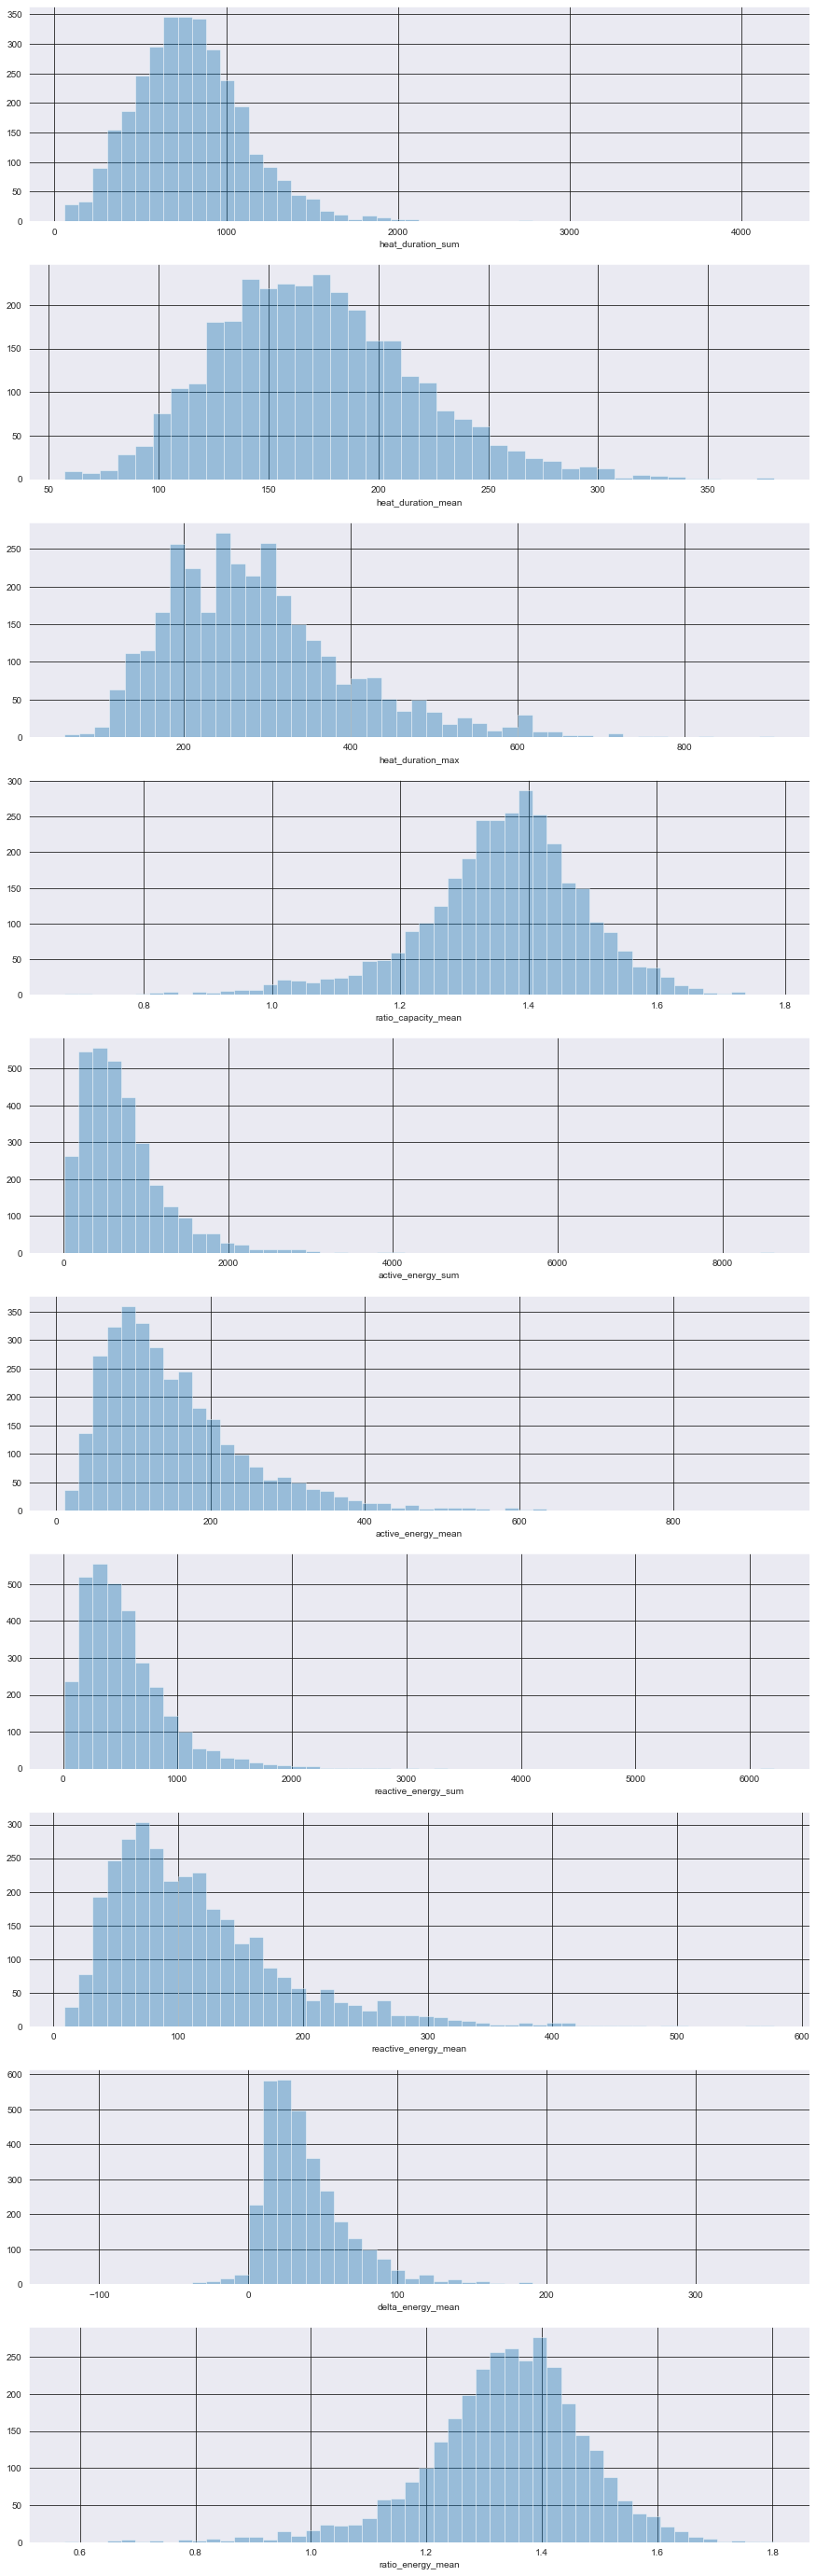

In [51]:
fig, ax = plt.subplots(data_arc_group.drop(columns = 'key').shape[1] , 1, figsize=(15,50))
i = 0
for col in data_arc_group.drop(columns = 'key').columns:
  sns.distplot(data_arc_group[col].dropna(), kde = False, ax = ax[i])
  i +=1

Везде наблюдаем нормальное распределение

### 3.1.3 data_gas

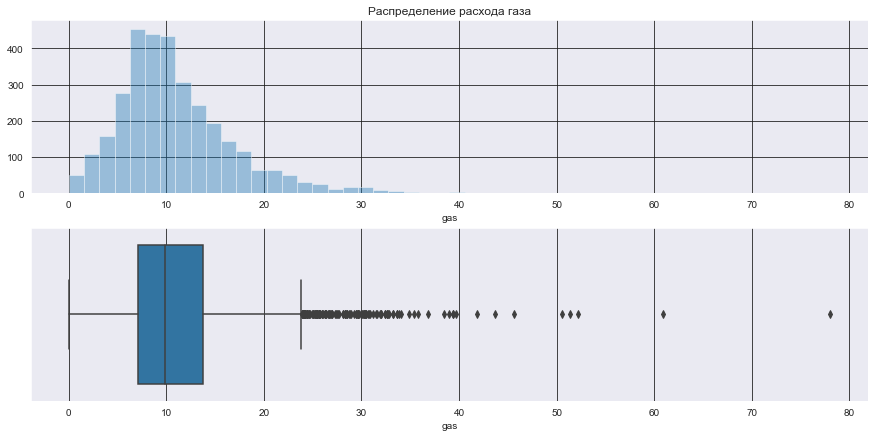

In [52]:
hist_box_plot(data_gas['gas'], 15, 7, 
              'Распределение расхода газа')

Нормальное распределение. есть выбросы

### 3.1.4 data_bulk  
Посмотрим на тепловую карту bulk по каждой плавке

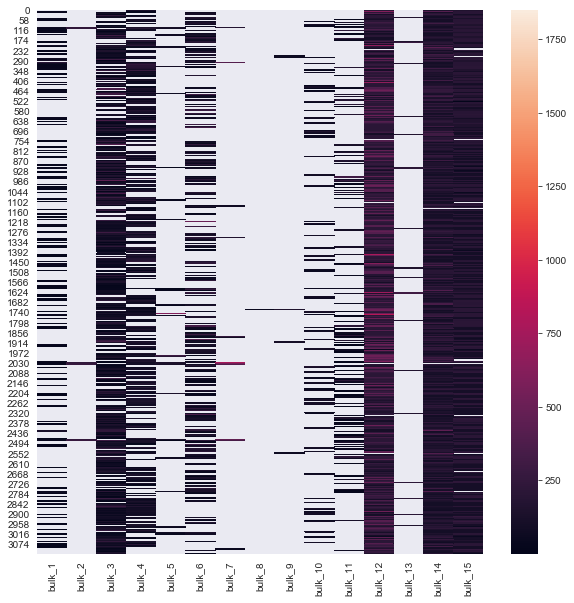

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(data_bulk.drop(['key'], axis = 1))

Каких либо аномалий не увидели, засыпка материалов из bulk происходит равномерно. Посмотрим на распредедения каждого bulk

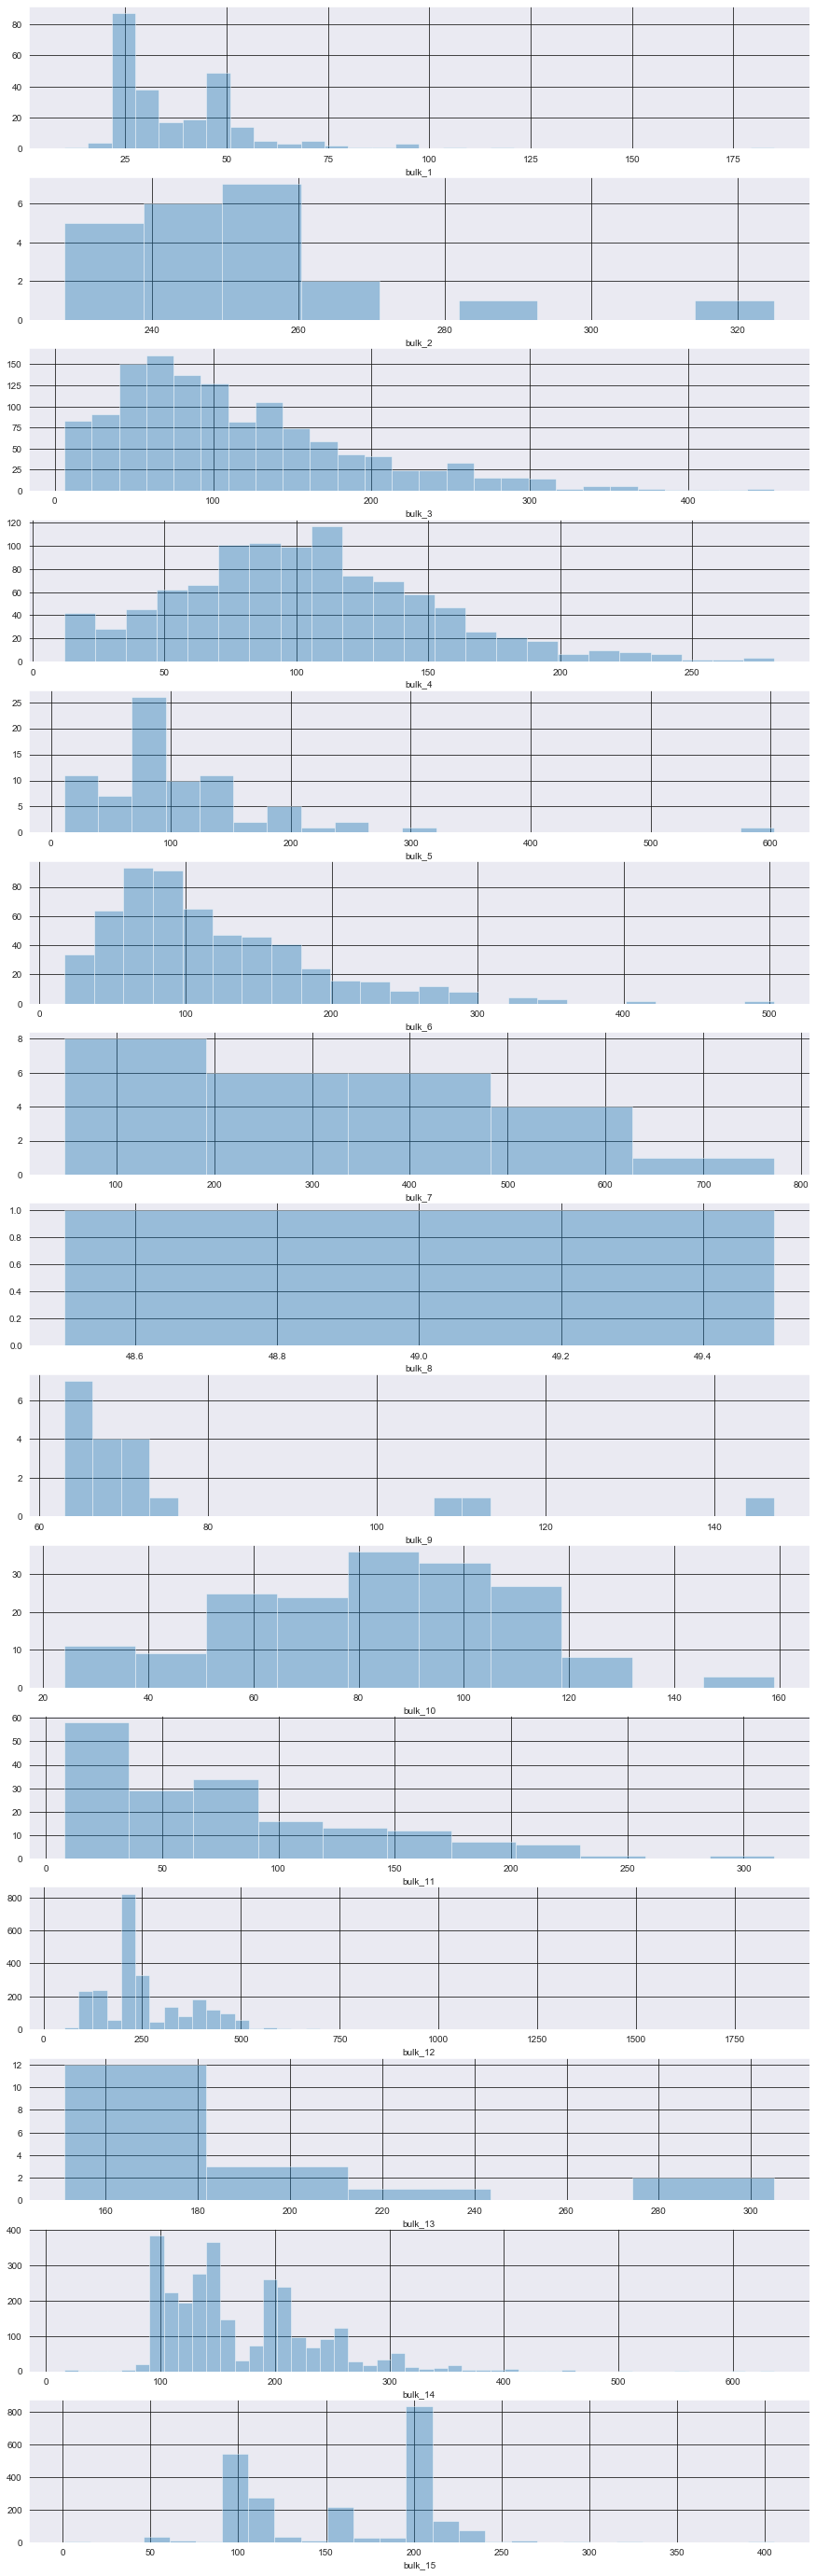

In [54]:
fig, ax = plt.subplots( data_bulk.shape[1] - 1, 1, figsize=(15,50))
i = 0
for col in data_bulk.drop(['key'], axis = 1).columns:
  sns.distplot(data_bulk[col].dropna(), kde = False, ax = ax[i])
  i +=1

В целом можно сказать что все bulk имеют нормальное распределение со скошенностью вправо + выбросы.  По некоторым bulk это слабо просматривается, т.к. очень мало значений и накладывается "шум", либо есть только одно значение.

Создадим и посмотрим на распределение суммарного, максимального, минимального значений bulk за правку


In [55]:
data_bulk['bulk_sum'] = data_bulk[['bulk_'+ str(i) for i in  range(1,16)]].fillna(0).sum(axis = 1)

In [56]:
data_bulk.head()

,key,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,bulk_sum
0,1,NaN,NaN,NaN,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,150.0,154.0,553.0
1,2,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,206.0,NaN,149.0,154.0,582.0
2,3,NaN,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,205.0,NaN,152.0,153.0,544.0
3,4,NaN,NaN,NaN,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,207.0,NaN,153.0,154.0,595.0
4,5,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,203.0,NaN,151.0,152.0,584.0


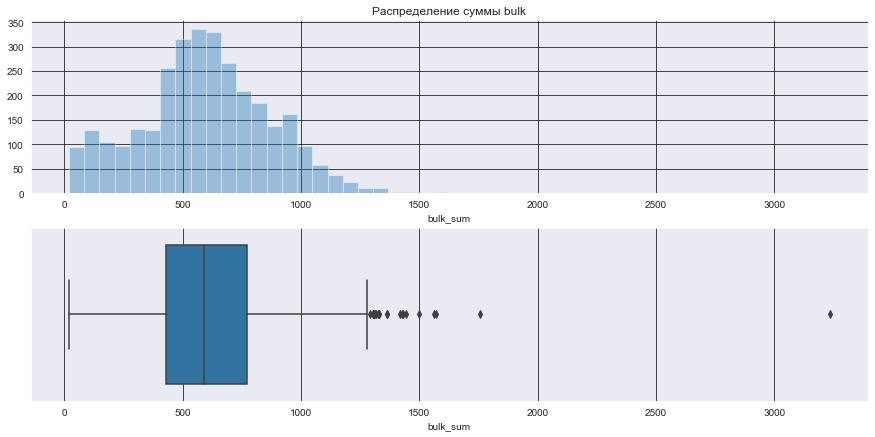

In [57]:
hist_box_plot(data_bulk['bulk_sum'], 15, 7, 
              'Распределение суммы bulk')

bulk_sum, похоже на нормальное распределение 

### 3.1.5 data_wire
Проведем исследование аналогично как для data_bulk

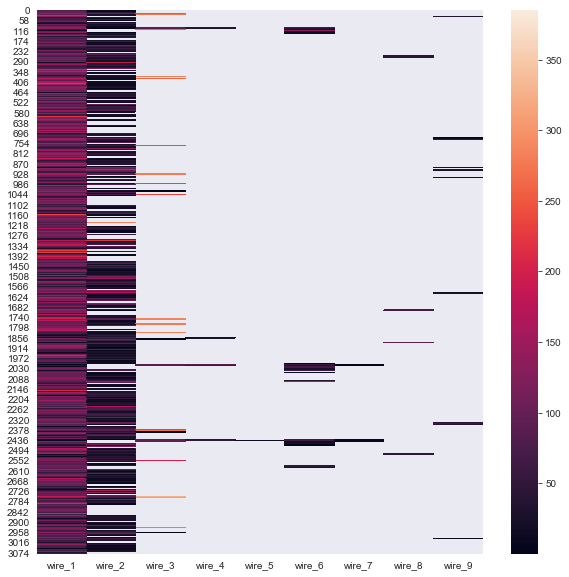

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(data_wire.drop(['key'], axis = 1))

Аномалий в распределении wire по плавкам не наблюдается

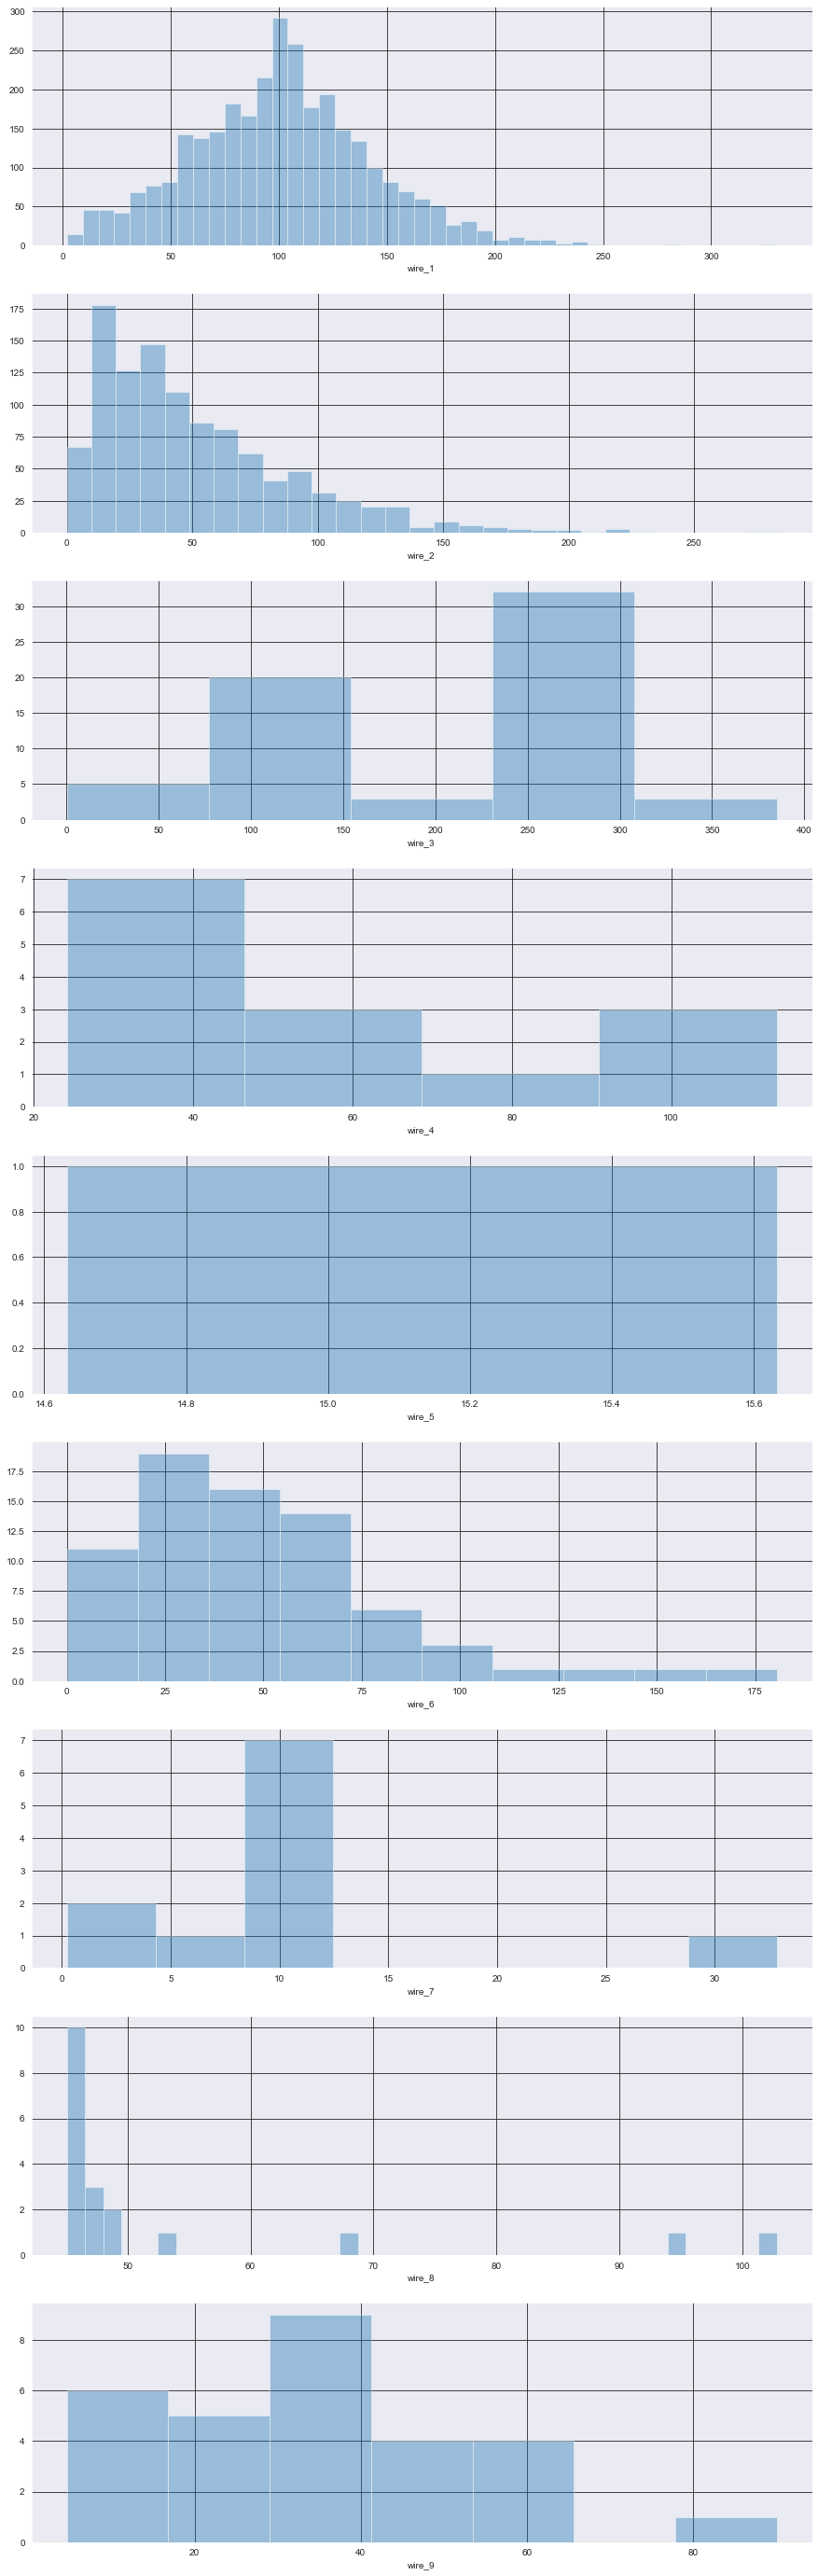

In [59]:
fig, ax = plt.subplots( data_wire.shape[1] - 1, 1, figsize=(15,50))
i = 0
for col in data_wire.drop(['key'], axis = 1).columns:
  sns.distplot(data_wire[col].dropna(), kde = False, ax = ax[i])
  i +=1

В целом можно сказать что все wire имеют нормальное распределение + выбросы.  По некоторым wire это слабо просматривается, т.к. очень мало значений и накладывается "шум", либо есть только одно значение

In [60]:
data_wire['wire_sum'] = data_wire[['wire_'+ str(i) for i in  range(1,10)]].fillna(0).sum(axis = 1)

In [61]:
data_wire.head()

,key,wire_1,wire_2,wire_3,wire_4,wire_5,wire_6,wire_7,wire_8,wire_9,wire_sum
0,1,60.059998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.059998
1,2,96.052315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.052315
2,3,91.160157,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.160157
3,4,89.063515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.063515
4,5,89.238236,9.11456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.352796


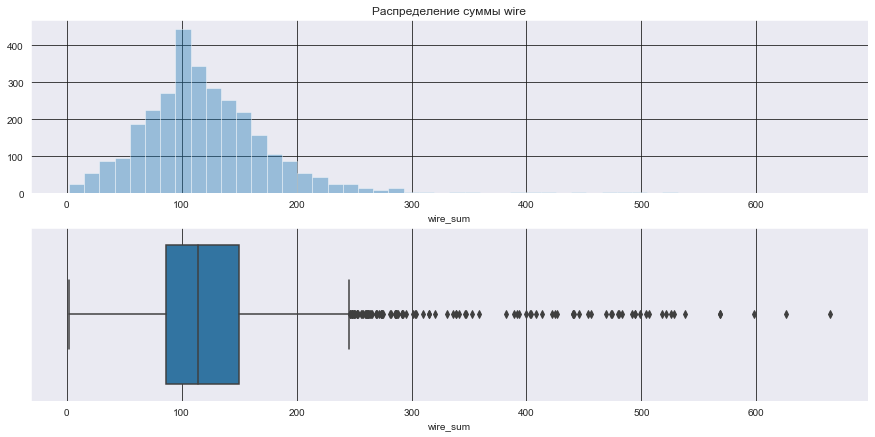

In [62]:
hist_box_plot(data_wire['wire_sum'], 15, 7, 
              'Распределение суммы wire')

wire_sum - нормальное распределение, есть выбросы  

## 3.2  Корреляционный анализ  
Объединим все данные техпроцесса в один датасет с разбивкой по плавкам. 
#### Тут уже рассматриваем только "хорошие" плавки, которые задействуем в подборе модели предсказания. Они содержатся в датасете _data_temp_start_end_

In [63]:
data_full = data_temp_start_end.merge(
    data_arc_group, on = 'key', how = 'left').merge(
    data_gas, on = 'key', how = 'left').merge(
    data_bulk, on='key', how = 'left').merge(  
    data_bulk_time, on='key', how = 'left').merge(
    data_wire, on='key', how = 'left').merge( 
    data_wire_time, on='key', how = 'left')

In [64]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 69 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   key                   2475 non-null   int64         
 1   sample_time_start     2475 non-null   datetime64[ns]
 2   temp_start            2475 non-null   float64       
 3   sample_time_end       2475 non-null   datetime64[ns]
 4   temp_end              2475 non-null   float64       
 5   delta_temp            2475 non-null   float64       
 6   number_samples        2475 non-null   int64         
 7   delta_time_minutes    2475 non-null   float64       
 8   heat_duration_sum     2475 non-null   float64       
 9   heat_duration_mean    2475 non-null   float64       
 10  heat_duration_max     2475 non-null   float64       
 11  ratio_capacity_mean   2475 non-null   float64       
 12  active_energy_sum     2475 non-null   float64       
 13  active_energy_mean

Видим что имеются столбцы только с пропусками. Удалим их

In [65]:
data_full.head(10)

,key,sample_time_start,temp_start,sample_time_end,temp_end,delta_temp,number_samples,delta_time_minutes,heat_duration_sum,heat_duration_mean,...,wire_sum,wire_time_1,wire_time_2,wire_time_3,wire_time_4,wire_time_5,wire_time_6,wire_time_7,wire_time_8,wire_time_9
0,1,2019-05-03 11:16:18,1571.0,2019-05-03 11:30:39,1613.0,42.0,5,14.0,1098.0,219.60,...,60.059998,2019-05-03 11:11:41,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
1,2,2019-05-03 11:37:27,1581.0,2019-05-03 11:59:12,1602.0,21.0,6,21.0,811.0,202.75,...,96.052315,2019-05-03 11:46:10,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
2,3,2019-05-03 12:13:17,1596.0,2019-05-03 12:34:57,1599.0,3.0,5,21.0,655.0,131.00,...,91.160157,2019-05-03 12:13:47,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
3,4,2019-05-03 12:52:57,1601.0,2019-05-03 12:59:25,1625.0,24.0,3,6.0,741.0,185.25,...,89.063515,2019-05-03 12:48:05,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
4,5,2019-05-03 13:23:19,1576.0,2019-05-03 13:36:01,1602.0,26.0,2,12.0,869.0,217.25,...,98.352796,2019-05-03 13:18:15,2019-05-03 13:32:06,NaT,NaT,NaT,NaT,NaT,NaT,NaT
5,6,2019-05-03 13:49:24,1543.0,2019-05-03 14:12:29,1596.0,53.0,5,23.0,952.0,238.00,...,108.224477,2019-05-03 13:59:02,2019-05-03 13:59:54,NaT,NaT,NaT,NaT,NaT,NaT,NaT
6,7,2019-05-03 14:19:43,1586.0,2019-05-03 14:42:37,1599.0,13.0,5,22.0,673.0,168.25,...,98.061600,2019-05-03 14:28:46,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
7,8,2019-05-03 15:07:18,1577.0,2019-05-03 15:22:52,1598.0,21.0,4,15.0,913.0,228.25,...,155.282394,2019-05-03 15:03:42,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT
8,9,2019-05-03 15:37:03,1587.0,2019-05-03 16:01:16,1592.0,5.0,5,24.0,625.0,125.00,...,122.536960,2019-05-03 15:42:43,2019-05-03 15:58:12,NaT,NaT,NaT,NaT,NaT,NaT,NaT
9,10,2019-05-03 16:14:29,1574.0,2019-05-03 16:36:08,1593.0,19.0,8,21.0,825.0,137.50,...,93.620796,2019-05-03 16:20:25,2019-05-03 16:21:02,NaT,NaT,NaT,NaT,NaT,NaT,NaT


In [66]:
data_full = data_full.dropna(axis=1, how='all')

Посмотрим на корреляцию.
При расчете корреляции заполняем пропуски нулями. Это делается для bulk и wire т.к. их пропуски означают что подача материала не происходила т.е. = 0.  

Text(0.5, 1, 'Тепловая карта корреляций признаков с разбивкой по плавкам')

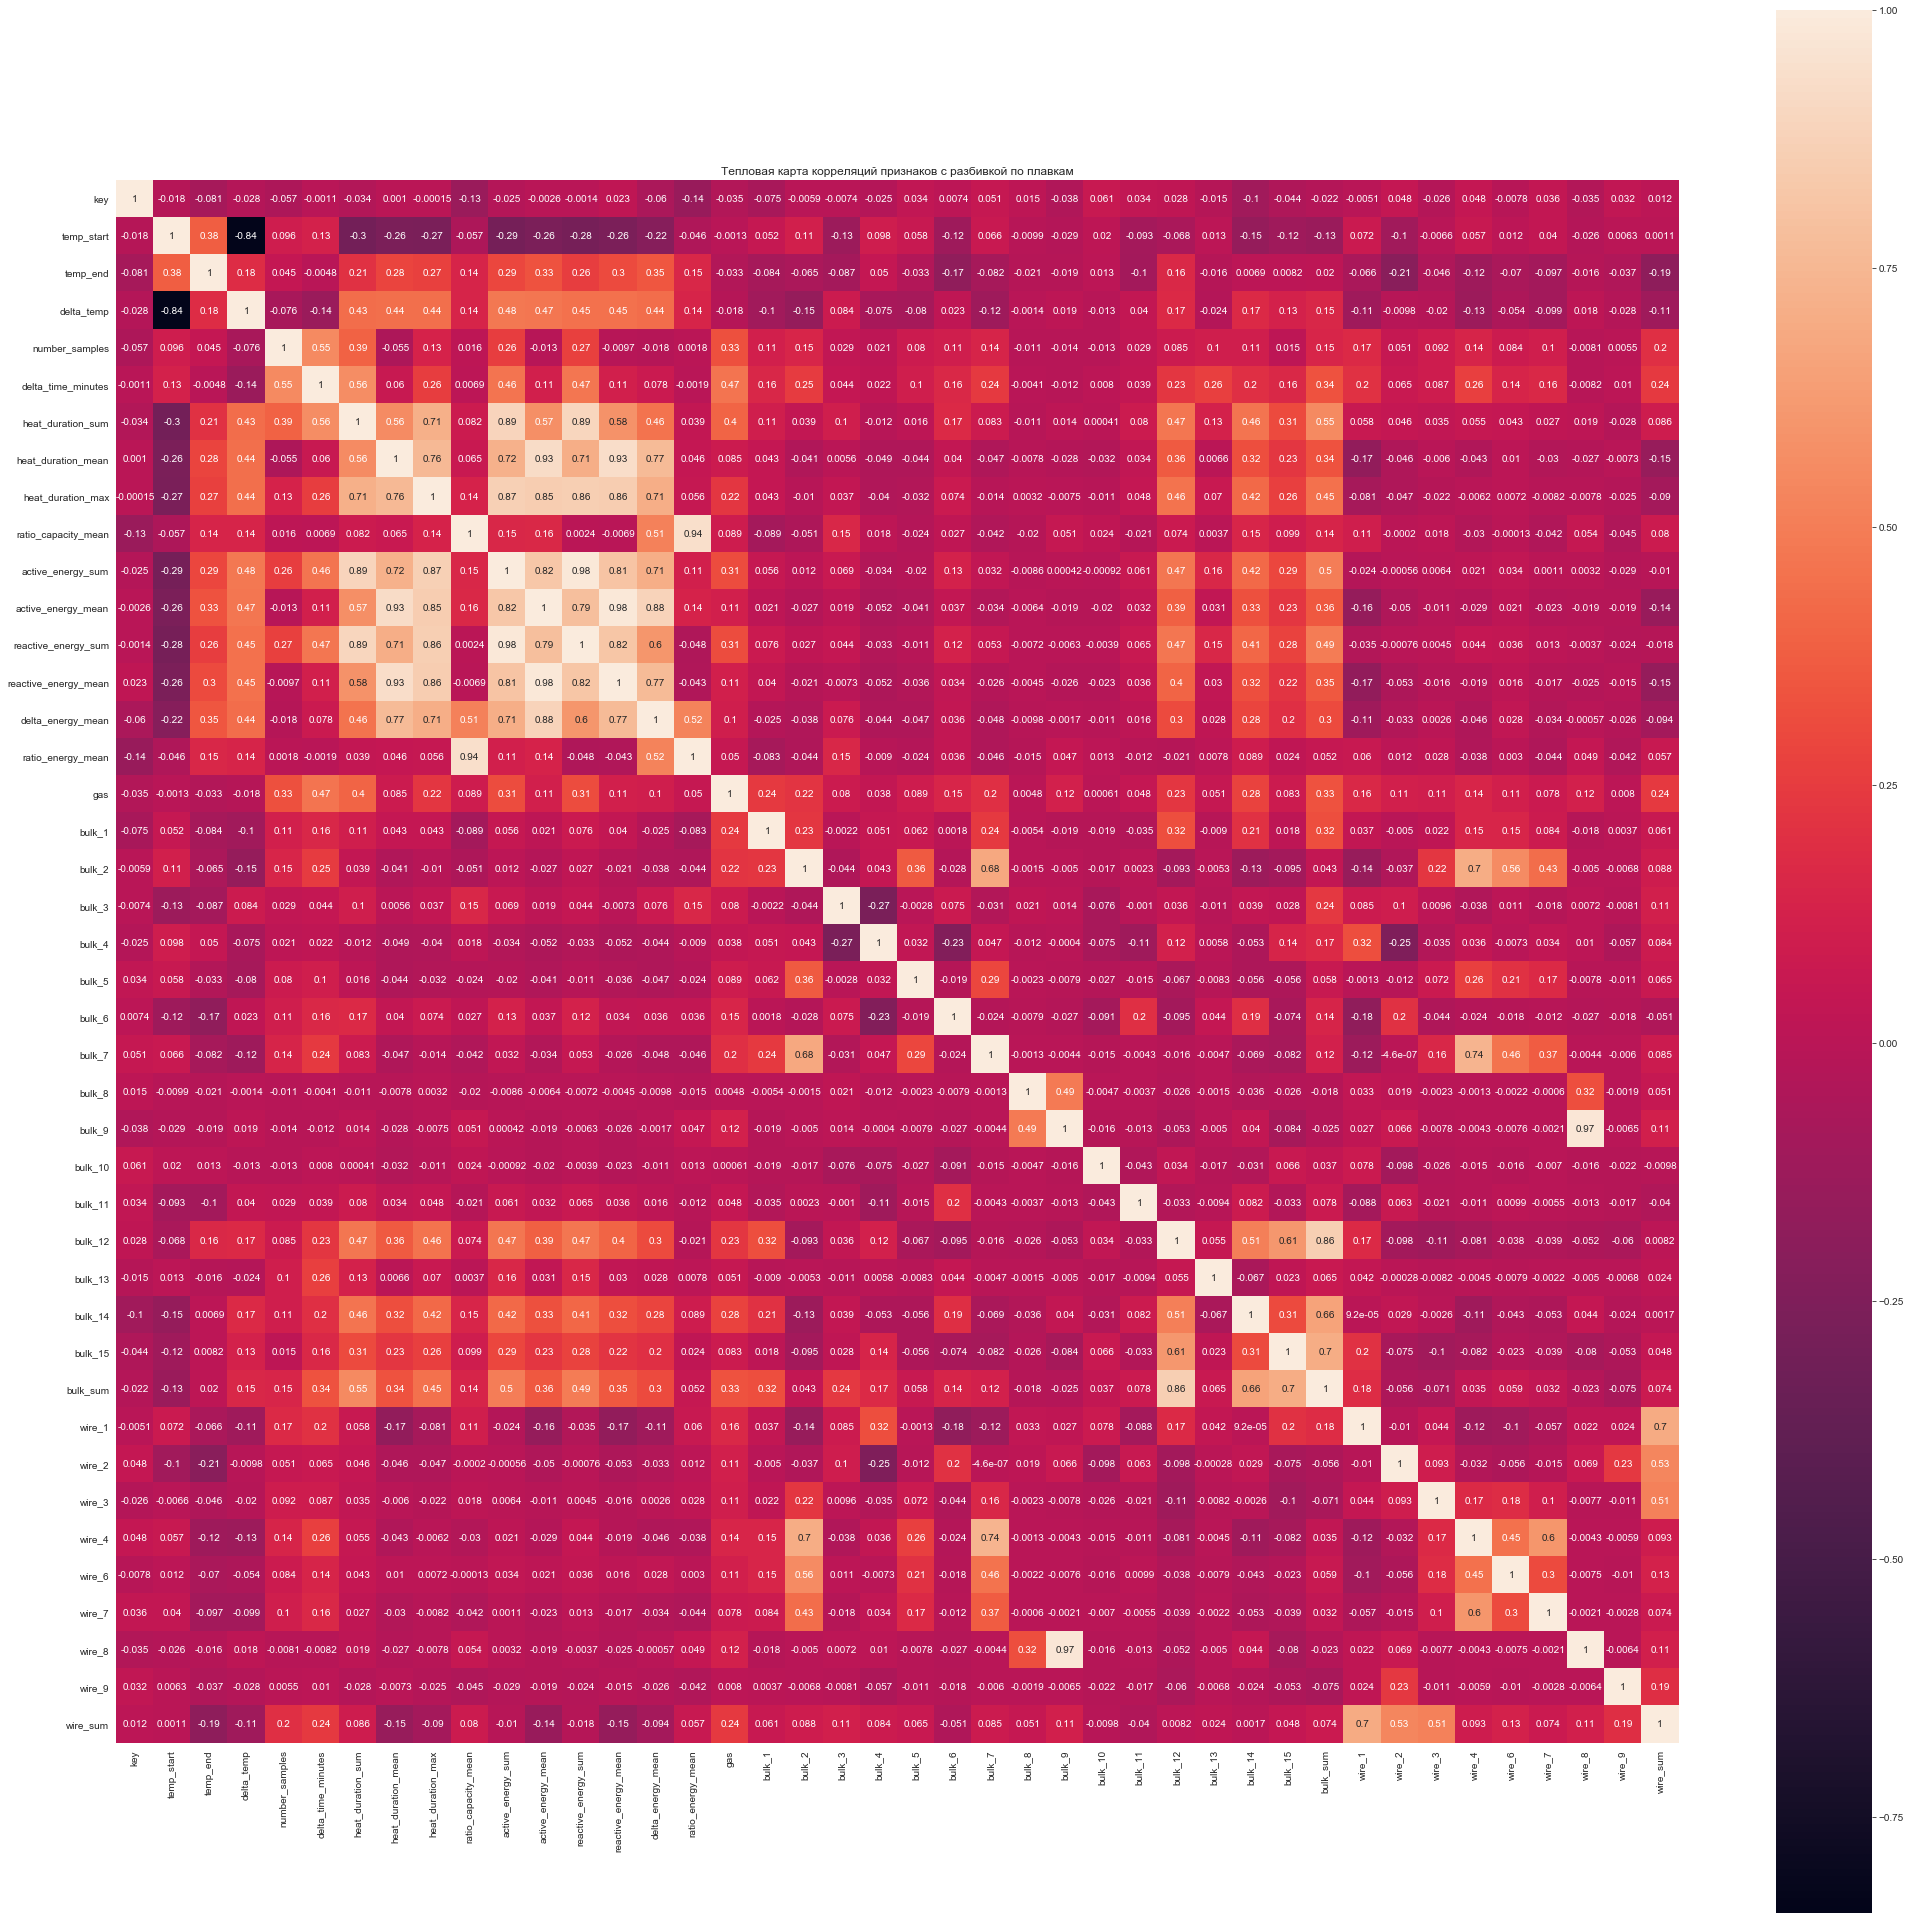

In [67]:
plt.figure(figsize=(35,35))
sns.heatmap(data_full.fillna(0).corr(), annot=True, fmt='.2g', square=True)
plt.title('Тепловая карта корреляций признаков с разбивкой по плавкам')

Вывод по корреляционному анализу сделаем ниже

## 3.3 Общий вывод по исследовательскому анализу
1. В датасете имеются плавки с пропущенными последними измерениями температуры, которые являются целевым признаком.  Такие плавки удалены из рассмотрения.
2. Нарушена последовательность во времени - некоторые плавки выбиваются из общей последовательности во времени если смотреть по их порядковому номеру.  Но в задаче об этом ничего не сказано, поэтому такие плавки не удалялись. 
3. Имеется очень много пропусков в таблицах bulk и wire. Это интерпретируем как "материал не вводился" и заполнили такие пропуски нулями.
4. Исследованы распределения имеющихся признаков по плавкам + сгенерированным признакам (длительность процессов, разницы значений, sum/max/min по bulk и wire). Практически все признаки имеют нормальное распределение + выбросы.
5. Почти у всех признаков есть выбросы и не понятно - можно ли их рассматривать как ошибки в данных
5. Корреляционный анализ показал:  
    5.1. Имеется корреляция для многих величин, но нас впервую очередь интересует корреляция с целевым признаком - temp_end  
    5.2. Целевой признак имеет корреляцию с:
    - temp_start
    - delta_temp - (но его применить не сможем, это утечка данных)
    - heat_duration_sum / mean / max
    - active_energy_sum / mean
    - reactive_energy_sum / mean
    - delta_energy_mean
    - wire_sum, wire_max
    Отметим, что эти признаки созданы нами самостоятельно и помогут при обучении модели

# 4. Подготовка данных для обучающих моделей
## Замечание
Если сейчас передать данные в нашу модель, то она даст очень высокую точность. Причина - у нас есть признак delta_temp, который мы создали сами с использованием целевого признака.  Таким образом целевой признак temp_end можно найти как delta_temp + start_temp - эффект "подглядывания" в будущее.  ПОэтому правильным решением будет удалить этот признак.  
  
Также удалим из созданного общего датасета временные признаки т.к. они не будут участвовать в обучении модели и столбец с номером плавки key

In [68]:
data_full = data_full.drop(columns = list(data_full.dtypes[data_full.dtypes == 'datetime64[ns]'].index) + ['key', 'delta_temp'])
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp_start            2475 non-null   float64
 1   temp_end              2475 non-null   float64
 2   number_samples        2475 non-null   int64  
 3   delta_time_minutes    2475 non-null   float64
 4   heat_duration_sum     2475 non-null   float64
 5   heat_duration_mean    2475 non-null   float64
 6   heat_duration_max     2475 non-null   float64
 7   ratio_capacity_mean   2475 non-null   float64
 8   active_energy_sum     2475 non-null   float64
 9   active_energy_mean    2475 non-null   float64
 10  reactive_energy_sum   2475 non-null   float64
 11  reactive_energy_mean  2475 non-null   float64
 12  delta_energy_mean     2475 non-null   float64
 13  ratio_energy_mean     2475 non-null   float64
 14  gas                   2473 non-null   float64
 15  bulk_1               

Остались 2 пропуска в gas. У газа корреляция 45% с delta_time_minutes. Можем заполнить пропуски в газе через линейную регрессию с признаком delta_time_minutes.  
Узнаем адреса пропусков

In [69]:
data_full[data_full['gas'].isna()]['gas']

190   NaN
255   NaN
Name: gas, dtype: float64

In [70]:
# Реализуем модель линейной регрессии для предсказания gas

model_gas = LinearRegression()
X =  data_full['delta_time_minutes']
y = data_full['gas']

X_train , y_train = X[~data_full['gas'].isna()] , y[~data_full['gas'].isna()]
X_test , y_test = X[data_full['gas'].isna()] , y[data_full['gas'].isna()]

model_gas.fit(X_train.values.reshape(-1, 1), y_train)
prediction = model_gas.predict(X_test.values.reshape(-1, 1))

del model_gas, X, y, X_train , y_train, X_test , y_test
prediction

array([12.582514  ,  9.45181195])

In [71]:
data_full.loc[190, 'gas'] = prediction[0]
data_full.loc[255, 'gas'] = prediction[1]

In [72]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp_start            2475 non-null   float64
 1   temp_end              2475 non-null   float64
 2   number_samples        2475 non-null   int64  
 3   delta_time_minutes    2475 non-null   float64
 4   heat_duration_sum     2475 non-null   float64
 5   heat_duration_mean    2475 non-null   float64
 6   heat_duration_max     2475 non-null   float64
 7   ratio_capacity_mean   2475 non-null   float64
 8   active_energy_sum     2475 non-null   float64
 9   active_energy_mean    2475 non-null   float64
 10  reactive_energy_sum   2475 non-null   float64
 11  reactive_energy_mean  2475 non-null   float64
 12  delta_energy_mean     2475 non-null   float64
 13  ratio_energy_mean     2475 non-null   float64
 14  gas                   2475 non-null   float64
 15  bulk_1               

Остались пропуски в столбцах wire и bulk. Заполняем их нулями

In [73]:
data_full = data_full.fillna(0)
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2475 entries, 0 to 2474
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temp_start            2475 non-null   float64
 1   temp_end              2475 non-null   float64
 2   number_samples        2475 non-null   int64  
 3   delta_time_minutes    2475 non-null   float64
 4   heat_duration_sum     2475 non-null   float64
 5   heat_duration_mean    2475 non-null   float64
 6   heat_duration_max     2475 non-null   float64
 7   ratio_capacity_mean   2475 non-null   float64
 8   active_energy_sum     2475 non-null   float64
 9   active_energy_mean    2475 non-null   float64
 10  reactive_energy_sum   2475 non-null   float64
 11  reactive_energy_mean  2475 non-null   float64
 12  delta_energy_mean     2475 non-null   float64
 13  ratio_energy_mean     2475 non-null   float64
 14  gas                   2475 non-null   float64
 15  bulk_1               

Выделяем признаки и целевой признак

In [74]:
X = data_full.drop(columns = ['temp_end'])
y = data_full['temp_end']

Разбиваем на train и test

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 100500) 

In [76]:
print(X_train.shape)
print(X_test.shape)

(2227, 39)
(248, 39)


In [77]:
pd.set_option('display.max_columns', 50)
X.head(10)

,temp_start,number_samples,delta_time_minutes,heat_duration_sum,heat_duration_mean,heat_duration_max,ratio_capacity_mean,active_energy_sum,active_energy_mean,reactive_energy_sum,reactive_energy_mean,delta_energy_mean,ratio_energy_mean,gas,bulk_1,bulk_2,bulk_3,bulk_4,bulk_5,bulk_6,bulk_7,bulk_8,bulk_9,bulk_10,bulk_11,bulk_12,bulk_13,bulk_14,bulk_15,bulk_sum,wire_1,wire_2,wire_3,wire_4,wire_6,wire_7,wire_8,wire_9,wire_sum
0,1571.0,5,14.0,1098.0,219.60,365.0,1.538898,1207.804249,241.560850,787.907510,157.581502,83.979348,1.532926,29.749986,0.0,0.0,0.0,43.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,150.0,154.0,553.0,60.059998,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,60.059998
1,1581.0,6,21.0,811.0,202.75,338.0,1.551834,733.816470,183.454118,487.590677,121.897669,61.556448,1.504985,12.555561,0.0,0.0,0.0,73.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,206.0,0.0,149.0,154.0,582.0,96.052315,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,96.052315
2,1596.0,5,21.0,655.0,131.00,280.0,1.583120,443.583327,88.716665,280.936835,56.187367,32.529298,1.578943,28.554793,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,205.0,0.0,152.0,153.0,544.0,91.160157,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,91.160157
3,1601.0,3,6.0,741.0,185.25,278.0,1.563487,670.663327,167.665832,429.935932,107.483983,60.181849,1.559915,18.841219,0.0,0.0,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,207.0,0.0,153.0,154.0,595.0,89.063515,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,89.063515
4,1576.0,2,12.0,869.0,217.25,415.0,1.480428,997.496095,249.374024,664.940090,166.235022,83.139001,1.500129,5.413692,0.0,0.0,0.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,151.0,152.0,584.0,89.238236,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,98.352796
5,1543.0,5,23.0,952.0,238.00,398.0,1.501854,1157.263817,289.315954,804.657489,201.164372,88.151582,1.438207,11.273392,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,0.0,201.0,154.0,676.0,99.109917,9.114560,0.0,0.0,0.0,0.0,0.0,0.0,108.224477
6,1586.0,5,22.0,673.0,168.25,357.0,1.628748,622.474471,155.618618,380.925081,95.231270,60.387347,1.634113,9.836267,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,204.0,0.0,152.0,154.0,627.0,98.061600,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,98.061600
7,1577.0,4,15.0,913.0,228.25,435.0,1.486391,1246.965366,311.741341,917.490256,229.372564,82.368778,1.359105,15.171553,0.0,0.0,0.0,99.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,410.0,0.0,252.0,153.0,914.0,155.282394,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,155.282394
8,1587.0,5,24.0,625.0,125.00,196.0,1.421598,331.455184,66.291037,234.774681,46.954936,19.336101,1.411801,8.216623,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,107.0,0.0,99.0,203.0,526.0,113.393279,9.143681,0.0,0.0,0.0,0.0,0.0,0.0,122.536960
9,1574.0,8,21.0,825.0,137.50,257.0,1.231654,458.134349,76.355725,412.035721,68.672620,7.683105,1.111880,6.529891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,203.0,0.0,102.0,204.0,509.0,81.244796,12.376000,0.0,0.0,0.0,0.0,0.0,0.0,93.620796


Стандартизируем признаки

In [78]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

# 5 Обучаем разные модели
Для удобства будем использовать GridSearchCV, который уже включает кроссвалидацию. Задаем функции для обучения и предсказания

In [79]:
# Функция для обучения модели c помощью GridSearchCV и вычисления нужных величин

def model_train(X, y, model):
  # Время начала обучения
  start_time = timeit.default_timer()

  # Обучаем модель
  model.fit(X, y)

  # лучшая модель
  model_best =  model.best_estimator_

  # лучшие гиперпараметры
  model_best_params =  model.best_params_

  # Вычисляем лучшую метрику на кроссвалидации
  score_train = abs(model.best_score_)

  # Вычисляем время обучения
  fit_time = round(timeit.default_timer() - start_time, 1)

  # Выводим вычисленные величины
  print('Лучшие гиперпараметры:')
  print(model_best_params)
  print('Лучшая метрика на кроссвалидации: {}'.format(round(score_train,2)))
  print('Время обучения: {:.2} сек'.format(fit_time)) 
  print()

  # возвращаем обученную модель с лучшими ГП,
  # лучшие ГП, метрику, время обучения
  return model.best_estimator_ , model.best_params_, score_train, fit_time

In [80]:
# Функция для расчета метрики на тестовой выборке 
def model_test(X, y, model_fitted):
  # Время начала расчета
  start_time = timeit.default_timer()
  
  # Считаем метрику на тестовой выборке
  score_test = mean_absolute_error(y, model_fitted.predict(X))

  # Считаем время предсказания 
  predict_time = round(timeit.default_timer() - start_time, 3)

  # Выводим вычисленные величины
  print('Метрика на тестовой выборке: {}'.format(round(score_test,2)))
  print('Время предсказания: {} сек'.format(predict_time))

  # Возвращаем метрику на тестовой выборке и время предсказания
  return score_test, predict_time

## 5.1 Линейная регрессия c L1 регуляризацией

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    1.6s finished


Лучшие гиперпараметры:
{'alpha': 0.1}
Лучшая метрика на кроссвалидации: 7.33
Время обучения: 1.7 сек

Метрика на тестовой выборке: 7.2
Время предсказания: 0.0 сек


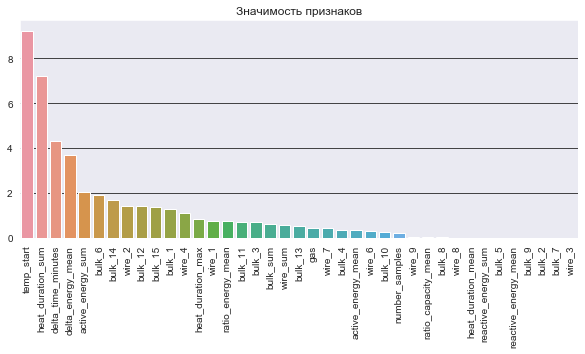

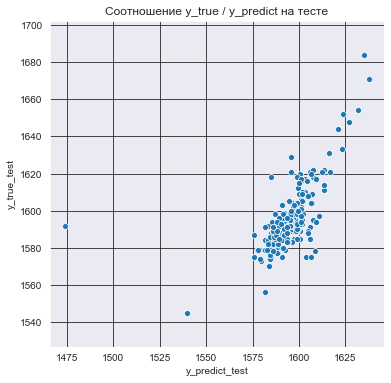

In [81]:
from sklearn.linear_model import Lasso

# У линейной регрессии нет гиперпараметров, но чтобы функция работала - зададим их формально
param_grid_lasso = {'alpha': [0.1]}

# Задаем модель
model_lasso = GridSearchCV(estimator = Lasso(), 
                       param_grid= param_grid_lasso, cv=3, n_jobs=-1 , scoring = 'neg_mean_absolute_error', verbose = 1)

# Обучаем модель
model_best_lasso, model_best_params_lasso, score_train_lasso, fit_time_lasso = model_train(X_train_st, y_train, model_lasso)

# Считаем метрику на тестовой выборке
score_test_lasso, predict_time_lasso =  model_test(X_test_st, y_test, model_best_lasso)


# Визуализация важности признаков
importances = pd.Series(data = abs(model_best_lasso.coef_), index = X.columns)
importances = importances.sort_values(ascending = False)

plt.figure(figsize = (10,4))
sns.barplot(x = list(importances.index) , y = importances)
plt.xticks(rotation = 90)
plt.title('Значимость признаков')
plt.show()

# Визуализация соотношения y_true / y_predict на тесте
plt.figure(figsize=(6,6))
sns.scatterplot(x = model_best_lasso.predict(X_test_st), y = y_test)
plt.axis('equal')
plt.title('Соотношение y_true / y_predict на тесте')
plt.xlabel('y_predict_test')
plt.ylabel('y_true_test')
plt.show()

## 5.2 Линейная регрессия c L2 регуляризацией

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.7s finished


Лучшие гиперпараметры:
{'alpha': 1.0}
Лучшая метрика на кроссвалидации: 7.36
Время обучения: 0.8 сек

Метрика на тестовой выборке: 7.25
Время предсказания: 0.001 сек


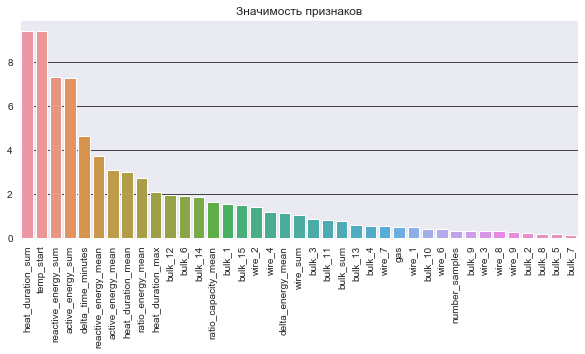

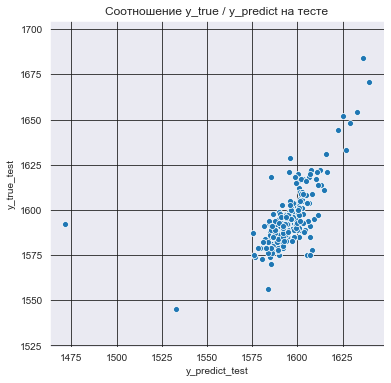

In [82]:
from sklearn.linear_model import Ridge
# У линейной регрессии нет гиперпараметров, но чтобы функция работала - зададим их формально
param_grid_Ridge = {'alpha': [1.]}

# Задаем модель
model_Ridge = GridSearchCV(estimator = Ridge(), 
                       param_grid= param_grid_Ridge, cv=3, n_jobs=-1 , scoring = 'neg_mean_absolute_error', verbose = 1)

# Обучаем модель
model_best_Ridge, model_best_params_Ridge, score_train_Ridge, fit_time_Ridge = model_train(X_train_st, y_train, model_Ridge)

# Считаем метрику на тестовой выборке
score_test_Ridge, predict_time_Ridge =  model_test(X_test_st, y_test, model_best_Ridge)



# Визуализация важности признаков
importances = pd.Series(data = abs(model_best_Ridge.coef_), index = X.columns)
importances = importances.sort_values(ascending = False)

plt.figure(figsize = (10,4))
sns.barplot(x = list(importances.index) , y = importances)
plt.xticks(rotation = 90)
plt.title('Значимость признаков')
plt.show()

# Визуализация соотношения y_true / y_predict на тесте
plt.figure(figsize=(6,6))
sns.scatterplot(x = model_best_Ridge.predict(X_test_st), y = y_test)
plt.axis('equal')
plt.title('Соотношение y_true / y_predict на тесте')
plt.xlabel('y_predict_test')
plt.ylabel('y_true_test')
plt.show()

## 5.3 Catboost

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   4 | elapsed:   26.1s remaining:   26.1s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   26.4s finished


Learning rate set to 0.045009
0:	learn: 15.6531573	total: 69.1ms	remaining: 1m 9s
1:	learn: 15.3219165	total: 79.7ms	remaining: 39.8s
2:	learn: 15.0132229	total: 86.7ms	remaining: 28.8s
3:	learn: 14.6833910	total: 92.5ms	remaining: 23s
4:	learn: 14.3698010	total: 98.6ms	remaining: 19.6s
5:	learn: 14.0747980	total: 103ms	remaining: 17.1s
6:	learn: 13.8058291	total: 108ms	remaining: 15.3s
7:	learn: 13.5238861	total: 113ms	remaining: 14s
8:	learn: 13.2486514	total: 118ms	remaining: 12.9s
9:	learn: 13.0159241	total: 122ms	remaining: 12.1s
10:	learn: 12.7683394	total: 128ms	remaining: 11.6s
11:	learn: 12.5504938	total: 133ms	remaining: 11s
12:	learn: 12.3291022	total: 138ms	remaining: 10.5s
13:	learn: 12.1543857	total: 144ms	remaining: 10.1s
14:	learn: 11.9645928	total: 149ms	remaining: 9.8s
15:	learn: 11.7846752	total: 155ms	remaining: 9.56s
16:	learn: 11.6176355	total: 160ms	remaining: 9.25s
17:	learn: 11.4731214	total: 165ms	remaining: 8.98s
18:	learn: 11.3305162	total: 171ms	remaining: 

160:	learn: 6.9218414	total: 1.67s	remaining: 8.69s
161:	learn: 6.9120435	total: 1.68s	remaining: 8.69s
162:	learn: 6.9078337	total: 1.69s	remaining: 8.66s
163:	learn: 6.9028039	total: 1.69s	remaining: 8.64s
164:	learn: 6.8900838	total: 1.7s	remaining: 8.6s
165:	learn: 6.8815365	total: 1.71s	remaining: 8.57s
166:	learn: 6.8677280	total: 1.71s	remaining: 8.54s
167:	learn: 6.8559136	total: 1.72s	remaining: 8.51s
168:	learn: 6.8419277	total: 1.72s	remaining: 8.48s
169:	learn: 6.8332833	total: 1.73s	remaining: 8.46s
170:	learn: 6.8211327	total: 1.74s	remaining: 8.43s
171:	learn: 6.8155147	total: 1.75s	remaining: 8.41s
172:	learn: 6.8014668	total: 1.75s	remaining: 8.37s
173:	learn: 6.7875088	total: 1.76s	remaining: 8.35s
174:	learn: 6.7747874	total: 1.76s	remaining: 8.32s
175:	learn: 6.7702402	total: 1.77s	remaining: 8.29s
176:	learn: 6.7649800	total: 1.78s	remaining: 8.26s
177:	learn: 6.7577697	total: 1.78s	remaining: 8.23s
178:	learn: 6.7424369	total: 1.79s	remaining: 8.2s
179:	learn: 6.7

320:	learn: 5.5820846	total: 2.7s	remaining: 5.71s
321:	learn: 5.5753635	total: 2.71s	remaining: 5.7s
322:	learn: 5.5736313	total: 2.71s	remaining: 5.69s
323:	learn: 5.5663262	total: 2.72s	remaining: 5.68s
324:	learn: 5.5591139	total: 2.73s	remaining: 5.67s
325:	learn: 5.5561780	total: 2.73s	remaining: 5.65s
326:	learn: 5.5497550	total: 2.74s	remaining: 5.64s
327:	learn: 5.5449556	total: 2.75s	remaining: 5.62s
328:	learn: 5.5373266	total: 2.75s	remaining: 5.61s
329:	learn: 5.5303311	total: 2.76s	remaining: 5.6s
330:	learn: 5.5240224	total: 2.76s	remaining: 5.58s
331:	learn: 5.5222829	total: 2.77s	remaining: 5.57s
332:	learn: 5.5208685	total: 2.77s	remaining: 5.55s
333:	learn: 5.5166397	total: 2.78s	remaining: 5.54s
334:	learn: 5.5146510	total: 2.78s	remaining: 5.53s
335:	learn: 5.5138038	total: 2.79s	remaining: 5.51s
336:	learn: 5.5062487	total: 2.79s	remaining: 5.5s
337:	learn: 5.4990280	total: 2.8s	remaining: 5.49s
338:	learn: 5.4983593	total: 2.81s	remaining: 5.47s
339:	learn: 5.493

498:	learn: 4.7439119	total: 3.74s	remaining: 3.75s
499:	learn: 4.7418905	total: 3.74s	remaining: 3.74s
500:	learn: 4.7365769	total: 3.75s	remaining: 3.73s
501:	learn: 4.7345959	total: 3.75s	remaining: 3.73s
502:	learn: 4.7277032	total: 3.76s	remaining: 3.71s
503:	learn: 4.7233923	total: 3.77s	remaining: 3.71s
504:	learn: 4.7196459	total: 3.77s	remaining: 3.7s
505:	learn: 4.7185509	total: 3.78s	remaining: 3.69s
506:	learn: 4.7141842	total: 3.78s	remaining: 3.68s
507:	learn: 4.7093794	total: 3.79s	remaining: 3.67s
508:	learn: 4.7042603	total: 3.79s	remaining: 3.66s
509:	learn: 4.7023238	total: 3.8s	remaining: 3.65s
510:	learn: 4.7009675	total: 3.81s	remaining: 3.64s
511:	learn: 4.6981786	total: 3.81s	remaining: 3.63s
512:	learn: 4.6978182	total: 3.82s	remaining: 3.63s
513:	learn: 4.6944734	total: 3.82s	remaining: 3.62s
514:	learn: 4.6905607	total: 3.83s	remaining: 3.61s
515:	learn: 4.6838795	total: 3.84s	remaining: 3.6s
516:	learn: 4.6759580	total: 3.84s	remaining: 3.59s
517:	learn: 4.6

673:	learn: 4.1175110	total: 4.78s	remaining: 2.31s
674:	learn: 4.1126309	total: 4.79s	remaining: 2.3s
675:	learn: 4.1097387	total: 4.79s	remaining: 2.3s
676:	learn: 4.1060288	total: 4.8s	remaining: 2.29s
677:	learn: 4.1039863	total: 4.81s	remaining: 2.28s
678:	learn: 4.1028445	total: 4.81s	remaining: 2.28s
679:	learn: 4.0967568	total: 4.82s	remaining: 2.27s
680:	learn: 4.0949957	total: 4.83s	remaining: 2.26s
681:	learn: 4.0920176	total: 4.83s	remaining: 2.25s
682:	learn: 4.0900581	total: 4.84s	remaining: 2.25s
683:	learn: 4.0858509	total: 4.84s	remaining: 2.24s
684:	learn: 4.0815046	total: 4.85s	remaining: 2.23s
685:	learn: 4.0805679	total: 4.86s	remaining: 2.22s
686:	learn: 4.0780520	total: 4.86s	remaining: 2.21s
687:	learn: 4.0751356	total: 4.87s	remaining: 2.21s
688:	learn: 4.0724190	total: 4.87s	remaining: 2.2s
689:	learn: 4.0703701	total: 4.88s	remaining: 2.19s
690:	learn: 4.0664609	total: 4.89s	remaining: 2.19s
691:	learn: 4.0630665	total: 4.89s	remaining: 2.18s
692:	learn: 4.05

843:	learn: 3.6226300	total: 5.81s	remaining: 1.07s
844:	learn: 3.6215335	total: 5.82s	remaining: 1.07s
845:	learn: 3.6180143	total: 5.83s	remaining: 1.06s
846:	learn: 3.6165844	total: 5.83s	remaining: 1.05s
847:	learn: 3.6123124	total: 5.84s	remaining: 1.05s
848:	learn: 3.6091797	total: 5.84s	remaining: 1.04s
849:	learn: 3.6058490	total: 5.85s	remaining: 1.03s
850:	learn: 3.6027123	total: 5.86s	remaining: 1.02s
851:	learn: 3.6006220	total: 5.86s	remaining: 1.02s
852:	learn: 3.5988609	total: 5.87s	remaining: 1.01s
853:	learn: 3.5962644	total: 5.87s	remaining: 1s
854:	learn: 3.5938398	total: 5.88s	remaining: 997ms
855:	learn: 3.5895526	total: 5.88s	remaining: 990ms
856:	learn: 3.5883340	total: 5.89s	remaining: 983ms
857:	learn: 3.5838300	total: 5.89s	remaining: 976ms
858:	learn: 3.5828717	total: 5.9s	remaining: 968ms
859:	learn: 3.5817384	total: 5.91s	remaining: 961ms
860:	learn: 3.5779004	total: 5.91s	remaining: 954ms
861:	learn: 3.5758496	total: 5.92s	remaining: 947ms
862:	learn: 3.57

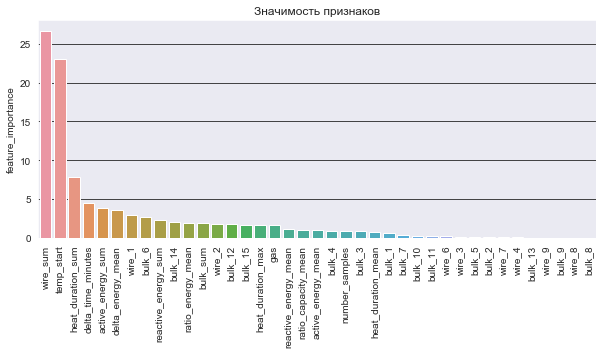

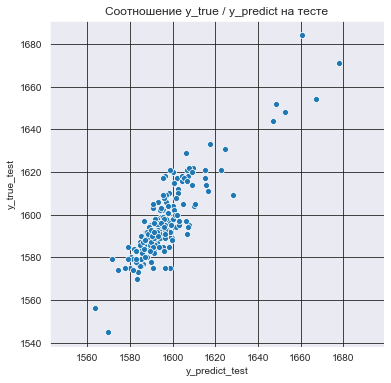

In [83]:
# Попробуем сперва без подбора ГП
param_grid_Cat = {'random_state': [100500]}
# Задаем модель
model_Cat = GridSearchCV(
    estimator = CatBoostRegressor(),  
    param_grid= param_grid_Cat, cv=4, verbose=1, n_jobs=-1, scoring = 'neg_mean_absolute_error')

# Обучаем модель
model_best_Cat, model_best_params_Cat, score_train_Cat, fit_time_Cat = model_train(X_train_st, y_train, model_Cat)

# Считаем метрику на тестовой выборке
score_test_Cat, predict_time_Cat =  model_test(X_test_st, y_test, model_best_Cat)


# Визуализируем важность признаков
importances = pd.Series(data = model_best_Cat.feature_importances_, index = X.columns, name='feature_importance')
importances = importances.sort_values(ascending = False)

plt.figure(figsize = (10,4))
sns.barplot(x = list(importances.index) , y = importances)
plt.xticks(rotation = 90)
plt.title('Значимость признаков')
plt.show()

# Визуализация соотношения y_true / y_predict на тесте
plt.figure(figsize=(6,6))
sns.scatterplot(x = model_best_Cat.predict(X_test_st), y = y_test)
plt.axis('equal')
plt.title('Соотношение y_true / y_predict на тесте')
plt.xlabel('y_predict_test')
plt.ylabel('y_true_test')
plt.show()

## 5.5 Сравнение моделей  
Оформим результаты в виде таблицы

In [84]:
models_analysis = pd.DataFrame({
   # Время обучения:        
    'fit_time_sec':[fit_time_lasso, fit_time_Ridge, fit_time_Cat],
    
     # Время предсказания: 
    'predict_time_sec':[predict_time_lasso, predict_time_Ridge, predict_time_Cat],
    
    # Метрика на кроссвалидации: 
    'train_mae_score':[score_train_lasso, score_train_Ridge, score_train_Cat],
    
    # Метрика на тесте: 
    'test_mae_score':[score_test_lasso, score_test_Ridge, score_test_Cat]
    
   }, index = ['lasso', 'Ridge', 'Cat'])
                                            
models_analysis

,fit_time_sec,predict_time_sec,train_mae_score,test_mae_score
lasso,1.7,0.000,7.334264,7.197509
Ridge,0.8,0.001,7.360046,7.251767
Cat,33.9,0.002,5.801506,5.607505


# 5.6 Вывод
1. Лучший результат на кроссвалидации показала модель Catboost. Соответственно в качестве лучшей модели выбираем ее. 
2. Также для каждой модели оценены значимости признаков - результаты выведены на графиках к каждой модели  